# Stock Price Forecasting Capstone Project

In [1]:
###======================================================================================###
### Shalesh Nath Sharma
### Python script for forecasting
### Forecast Assumptions Checks, AR, MA, Moving Average, ARIMA, SARIMA, Holt Winters,
### Auto-Arima, Facebook-Prophet Models for Time Series Forecasting
###======================================================================================###    

In [2]:
# DFuller test
# ADF test
# KPSS test
# Divide components 
# trend removal
# seasonality removal

# AR model, MA model 
# ARIMA model 
# Holtz Winter 

# Objective: To forecast daily returns on stocks

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import statsmodels
import datetime
import math
import itertools
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Prevent warning messages 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#Set Working Directory
import os
os.chdir(r"C:\\Users\\SHALESH\Desktop\\Capstone Project")
os.getcwd()  

'C:\\Users\\SHALESH\\Desktop\\Capstone Project'

In [3]:
pwd

'C:\\Users\\SHALESH\\Desktop\\Capstone Project'

## Data-Pull

In [306]:
### Create code for one of the company stocks 

# HDFC Bank Dataset (Intraday-1 min interval)
data0 = pd.read_csv("hdfcbank.csv")
data0.head(5)

,Unnamed: 0,date,open,high,low,close,volume,NA
0,0,2020-08-31T09:15:00+0530,1125.20,1143.10,1125.2,1142.80,24947,0
1,1,2020-08-31T09:16:00+0530,1143.25,1145.95,1141.5,1142.80,29617,0
2,2,2020-08-31T09:17:00+0530,1143.55,1146.50,1143.0,1144.80,21551,0
3,3,2020-08-31T09:18:00+0530,1145.05,1148.00,1144.6,1145.95,13455,0
4,4,2020-08-31T09:19:00+0530,1145.95,1147.00,1144.8,1145.75,8578,0


In [307]:
data=data0.copy()

In [308]:
### Drop irrelevant columns 
data.drop(['Unnamed: 0','NA'],1,inplace=True)

In [309]:
# Convert string to datetime64
data['date_new'] = data['date'].apply(pd.to_datetime)

data.set_index('date',inplace=True)
data.head(3)

,open,high,low,close,volume,date_new
date,,,,,,
2020-08-31T09:15:00+0530,1125.20,1143.10,1125.2,1142.8,24947,2020-08-31 09:15:00+05:30
2020-08-31T09:16:00+0530,1143.25,1145.95,1141.5,1142.8,29617,2020-08-31 09:16:00+05:30
2020-08-31T09:17:00+0530,1143.55,1146.50,1143.0,1144.8,21551,2020-08-31 09:17:00+05:30


In [310]:
data.shape

(7874, 6)

In [311]:
data['TICKER']= 'HDFCBANK'
data['TYPE'] = 'INTRADAY'

In [12]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'date_new', 'TICKER', 'TYPE'], dtype='object')

In [13]:
data.dtypes

open                                      float64
high                                      float64
low                                       float64
close                                     float64
volume                                      int64
date_new    datetime64[ns, pytz.FixedOffset(330)]
TICKER                                     object
TYPE                                       object
dtype: object

In [14]:
data.head(5)

,open,high,low,close,volume,date_new,TICKER,TYPE
date,,,,,,,,
2020-08-31T09:15:00+0530,1125.20,1143.10,1125.2,1142.80,24947,2020-08-31 09:15:00+05:30,HDFCBANK,INTRADAY
2020-08-31T09:16:00+0530,1143.25,1145.95,1141.5,1142.80,29617,2020-08-31 09:16:00+05:30,HDFCBANK,INTRADAY
2020-08-31T09:17:00+0530,1143.55,1146.50,1143.0,1144.80,21551,2020-08-31 09:17:00+05:30,HDFCBANK,INTRADAY
2020-08-31T09:18:00+0530,1145.05,1148.00,1144.6,1145.95,13455,2020-08-31 09:18:00+05:30,HDFCBANK,INTRADAY
2020-08-31T09:19:00+0530,1145.95,1147.00,1144.8,1145.75,8578,2020-08-31 09:19:00+05:30,HDFCBANK,INTRADAY


## Feature Engineering

In [15]:
# Analyse granularity of data (per minute data for 1 month tenure)
# 6 hrs of share trading = 6 X 60 =  360 records per day = 360 X 22 = 7920 records per month        

In [16]:
# close price: 1026-1147 INR
# Volume: 0 to 722k stocks are traded in last 1 month  

# 262 minutes on an average
# 4 hrs 

In [17]:
# Trading time: 09:15: 15:30

In [18]:
data.head(3)

,open,high,low,close,volume,date_new,TICKER,TYPE
date,,,,,,,,
2020-08-31T09:15:00+0530,1125.20,1143.10,1125.2,1142.8,24947,2020-08-31 09:15:00+05:30,HDFCBANK,INTRADAY
2020-08-31T09:16:00+0530,1143.25,1145.95,1141.5,1142.8,29617,2020-08-31 09:16:00+05:30,HDFCBANK,INTRADAY
2020-08-31T09:17:00+0530,1143.55,1146.50,1143.0,1144.8,21551,2020-08-31 09:17:00+05:30,HDFCBANK,INTRADAY


In [19]:
data.tail(3)

,open,high,low,close,volume,date_new,TICKER,TYPE
date,,,,,,,,
2020-09-28T15:27:00+0530,1057.00,1057.9,1056.65,1057.6,1620,2020-09-28 15:27:00+05:30,HDFCBANK,INTRADAY
2020-09-28T15:28:00+0530,1057.60,1059.0,1057.60,1058.7,745,2020-09-28 15:28:00+05:30,HDFCBANK,INTRADAY
2020-09-28T15:29:00+0530,1058.55,1058.6,1056.05,1058.5,722,2020-09-28 15:29:00+05:30,HDFCBANK,INTRADAY


In [20]:
today = pd.to_datetime('today')
today

Timestamp('2020-10-29 04:07:56.400662')

In [21]:
# For extracting date,time,day,month,year.week-year,month-year from datetime :

# date_new is in datetime format 

data['dt'] = data['date_new'].dt.date
data['tm'] = data['date_new'].dt.time
data['year'] = data['date_new'].dt.year
data['month'] = data['date_new'].dt.month
data['day'] = data['date_new'].dt.day 
data['week-year'] = data['date_new'].dt.strftime('%Y-%U')
data['month-year'] = data['date_new'].dt.strftime('%Y-%m')

In [22]:
# use this code when datetime variable is character type:-

# extract date from text datatime
# data['dt']=data['date_new'].str[:10] 

# extract time from text datetime
# data['time_stamp']=data['date'].str[-13:]

# Get a datetime type column from text datetime column
# data['date_new'] = pd.to_datetime(data['date'])

In [23]:
# convert volume from int to float type
data['volume'] = data['volume'].astype(float)

In [24]:
data.head(3)

,open,high,low,close,volume,date_new,TICKER,TYPE,dt,tm,year,month,day,week-year,month-year
date,,,,,,,,,,,,,,,
2020-08-31T09:15:00+0530,1125.20,1143.10,1125.2,1142.8,24947.0,2020-08-31 09:15:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:15:00,2020,8,31,2020-35,2020-08
2020-08-31T09:16:00+0530,1143.25,1145.95,1141.5,1142.8,29617.0,2020-08-31 09:16:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:16:00,2020,8,31,2020-35,2020-08
2020-08-31T09:17:00+0530,1143.55,1146.50,1143.0,1144.8,21551.0,2020-08-31 09:17:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:17:00,2020,8,31,2020-35,2020-08


In [25]:
data['dt'].unique() # 31Aug2020-28Sep2020 

array([datetime.date(2020, 8, 31), datetime.date(2020, 9, 1),
       datetime.date(2020, 9, 2), datetime.date(2020, 9, 3),
       datetime.date(2020, 9, 4), datetime.date(2020, 9, 7),
       datetime.date(2020, 9, 8), datetime.date(2020, 9, 9),
       datetime.date(2020, 9, 10), datetime.date(2020, 9, 11),
       datetime.date(2020, 9, 14), datetime.date(2020, 9, 15),
       datetime.date(2020, 9, 16), datetime.date(2020, 9, 17),
       datetime.date(2020, 9, 18), datetime.date(2020, 9, 21),
       datetime.date(2020, 9, 22), datetime.date(2020, 9, 23),
       datetime.date(2020, 9, 24), datetime.date(2020, 9, 25),
       datetime.date(2020, 9, 28)], dtype=object)

In [26]:
# Distinct Dates available in data 
data['dt'].value_counts().sort_index()  

2020-08-31    374
2020-09-01    375
2020-09-02    375
2020-09-03    375
2020-09-04    375
2020-09-07    375
2020-09-08    375
2020-09-09    375
2020-09-10    375
2020-09-11    375
2020-09-14    375
2020-09-15    375
2020-09-16    375
2020-09-17    375
2020-09-18    375
2020-09-21    375
2020-09-22    375
2020-09-23    375
2020-09-24    375
2020-09-25    375
2020-09-28    375
Name: dt, dtype: int64

In [27]:
# trim leading and trailing blanks in column values  
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [28]:
# Convert character date values to date type 
data['dt']=pd.to_datetime(data['dt'],format="%Y-%m-%d")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7874 entries, 2020-08-31T09:15:00+0530 to 2020-09-28T15:29:00+0530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype                                
---  ------      --------------  -----                                
 0   open        7874 non-null   float64                              
 1   high        7874 non-null   float64                              
 2   low         7874 non-null   float64                              
 3   close       7874 non-null   float64                              
 4   volume      7874 non-null   float64                              
 5   date_new    7874 non-null   datetime64[ns, pytz.FixedOffset(330)]
 6   TICKER      7874 non-null   object                               
 7   TYPE        7874 non-null   object                               
 8   dt          7874 non-null   datetime64[ns]                       
 9   tm          7874 non-null   object                               
 10

In [30]:
# ### filtering data (by day)

# Filter records based on date value 
data2=data[(data['dt'] == pd.Timestamp('2020-09-25'))] 
data2.shape

(375, 15)

In [31]:
# Filter records based on date range
data3=data.loc['2020-09-01':'2020-09-28']  
data3.shape

(7125, 15)

In [32]:
# Filter records based on closing price and volume 
data4=data[(data['close'] > 1035) & (data['volume'] <=10000)]  # (& is AND)  (| is OR)
data4.shape

(7500, 15)

In [33]:
# check up 
dt=['2020-08-31','2020-09-28'] 
pd.to_datetime(dt,format="%Y-%m-%d")

DatetimeIndex(['2020-08-31', '2020-09-28'], dtype='datetime64[ns]', freq=None)

In [34]:
data5=data.loc[data['dt']==('2020-08-31')] 
print(data5.shape)

(374, 15)


In [35]:
# Create Return variable (Based on %Change of closing price) (minute wise)    
  
data['prev_close_price'] = data['close'].shift(periods=1)
data['prev_close_price'] = data['prev_close_price'].fillna(0)


data['close_price_change'] = (data['close']/data['prev_close_price'])-1
data['close_price_change'] = data['close_price_change'].replace([np.inf, -np.inf], np.nan)
data['close_price_change'] = data['close_price_change'].fillna(0)

  
data['close_price_change2'] = data['close'].pct_change()
data['close_price_change2'] = data['close_price_change2'].replace([np.inf, -np.inf], np.nan)
data['close_price_change2'] = data['close_price_change2'].fillna(0)  

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15,8))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

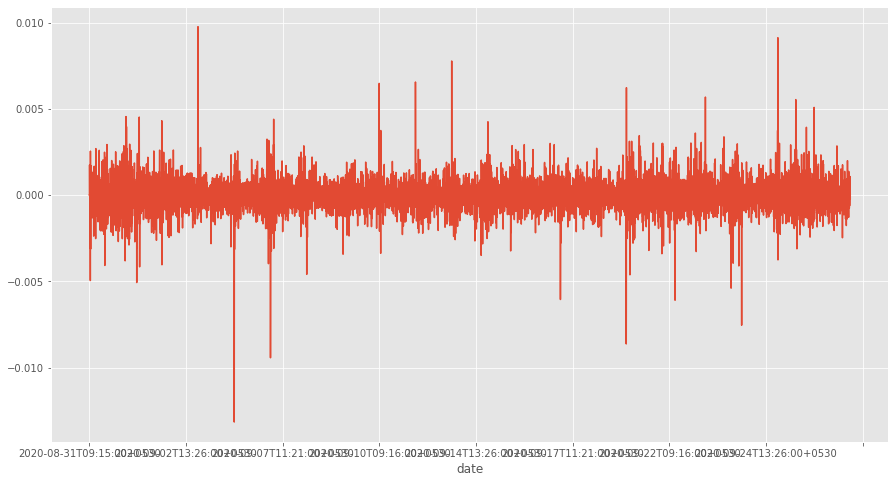

In [37]:
# plot the return variable
data['close_price_change'].plot(label='return')

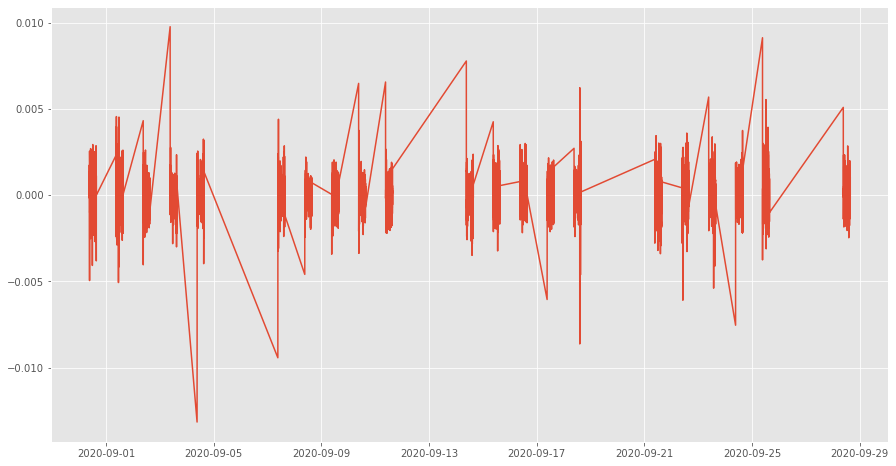

In [38]:
# plot the return variable (add x-axis)
plt.plot(data['date_new'],data['close_price_change'])

Logically, our ideal stocks should return as high and stable as possible. If you are risk averse(like me), you might want to avoid this stocks as you saw the 1% drop in 05 Sep 2020. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.

In [39]:
# Create Rolling average variable  (for close price)  
  
# This will calculate the Moving Average for the last 60 windows (60 minutes) of stocks closing price and take the average for each of the window’s
# moving average.

data['rolling_mean_close'] = data['close'].rolling(window=60).mean()
data['rolling_mean_close'] = np.where(data['rolling_mean_close'].isnull(), data['close'], data['rolling_mean_close'])

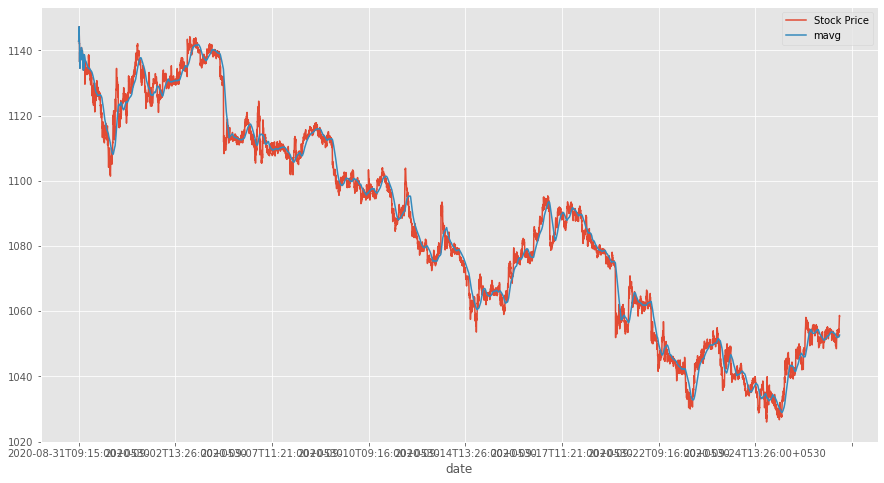

In [40]:
data['close'].plot(label='Stock Price')
data['rolling_mean_close'].plot(label='mavg')
plt.legend() # red=stock price, blue=moving average

- The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.
- In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn.

In [41]:
# Create Daily VWAP variable (Volume weighted average closing price) 

def vwap(df):
    q = df['volume']
    p = (df['close'])
    return df.assign(vwap=(p * q).sum() / q.sum())

data2 = data.groupby(data['dt'], group_keys=False).apply(vwap)      

In [42]:
data_chk=data2[(data2['dt'] == pd.Timestamp("2020-08-31"))]

In [43]:
data_chk.head(3)

,open,high,low,close,volume,date_new,TICKER,TYPE,dt,tm,year,month,day,week-year,month-year,prev_close_price,close_price_change,close_price_change2,rolling_mean_close,vwap
date,,,,,,,,,,,,,,,,,,,,
2020-08-31T09:15:00+0530,1125.20,1143.10,1125.2,1142.8,24947.0,2020-08-31 09:15:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:15:00,2020,8,31,2020-35,2020-08,0.0,0.00000,0.00000,1142.8,1125.676979
2020-08-31T09:16:00+0530,1143.25,1145.95,1141.5,1142.8,29617.0,2020-08-31 09:16:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:16:00,2020,8,31,2020-35,2020-08,1142.8,0.00000,0.00000,1142.8,1125.676979
2020-08-31T09:17:00+0530,1143.55,1146.50,1143.0,1144.8,21551.0,2020-08-31 09:17:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:17:00,2020,8,31,2020-35,2020-08,1142.8,0.00175,0.00175,1144.8,1125.676979


In [44]:
#Slicing on any day
vwap_subset=data2[(data2['dt'] == pd.Timestamp("2020-09-01"))]
print(vwap_subset.shape)
vwap_subset.head()
vwap_subset['vwap'].unique().tolist() # only 1 value shows which proves are calculation is correct 

(375, 20)


[1127.5689636221239]

In [45]:
#Slicing on any day
vwap_subset=data2[(data2['dt'] == pd.Timestamp("2020-08-31"))]
print(vwap_subset.shape)
vwap_subset.head()
vwap_subset['vwap'].unique().tolist() # only 1 value shows which proves are calculation is correct 

(374, 20)


[1125.6769793904602]

- The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has 
traded at throughout the day, based on both volume and price. 
- It is important because it provides traders with insight into 
both the trend and value of a security.

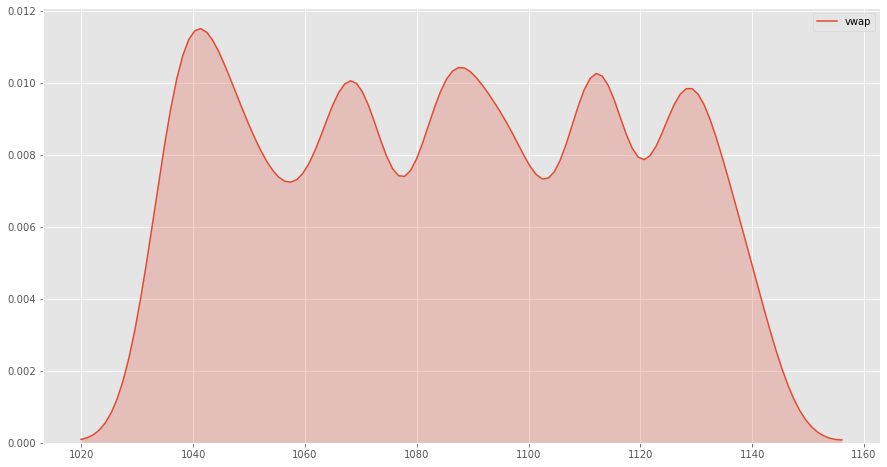

In [46]:
sns.kdeplot(data2['vwap'],shade=True)

### Exploratory data analysis (EDA)

In [47]:
data3=data2.copy()

In [48]:
# reorder columns in required order 
cols = list(data3)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('vwap')))

# use loc to reorder
data4 = data3.loc[:, cols]
data4.head(3)

,vwap,open,high,low,close,volume,date_new,TICKER,TYPE,dt,tm,year,month,day,week-year,month-year,prev_close_price,close_price_change,close_price_change2,rolling_mean_close
date,,,,,,,,,,,,,,,,,,,,
2020-08-31T09:15:00+0530,1125.676979,1125.20,1143.10,1125.2,1142.8,24947.0,2020-08-31 09:15:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:15:00,2020,8,31,2020-35,2020-08,0.0,0.00000,0.00000,1142.8
2020-08-31T09:16:00+0530,1125.676979,1143.25,1145.95,1141.5,1142.8,29617.0,2020-08-31 09:16:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:16:00,2020,8,31,2020-35,2020-08,1142.8,0.00000,0.00000,1142.8
2020-08-31T09:17:00+0530,1125.676979,1143.55,1146.50,1143.0,1144.8,21551.0,2020-08-31 09:17:00+05:30,HDFCBANK,INTRADAY,2020-08-31,09:17:00,2020,8,31,2020-35,2020-08,1142.8,0.00175,0.00175,1144.8


In [49]:
# check close price range, return range and volume range 

data4.describe()

,vwap,open,high,low,close,volume,year,month,day,prev_close_price,close_price_change,close_price_change2,rolling_mean_close
count,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000,7874.0,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000
mean,1085.392903,1085.638119,1086.219545,1085.026314,1085.632442,1099.460630,2020.0,8.952502,14.712217,1085.498012,-0.000009,-0.000009,1085.946872
std,32.156543,32.092640,32.103242,32.101024,32.098292,9535.329491,0.0,0.212715,8.695871,34.349527,0.000923,0.000923,32.080748
min,1036.928634,1026.000000,1027.500000,1025.150000,1026.000000,0.000000,2020.0,8.000000,1.000000,0.000000,-0.013143,-0.013143,1028.927500
25%,1058.379815,1055.850000,1056.600000,1055.000000,1055.850000,124.000000,2020.0,9.000000,8.000000,1055.850000,-0.000478,-0.000478,1057.712083
50%,1085.368876,1084.450000,1084.950000,1083.700000,1084.375000,356.000000,2020.0,9.000000,15.000000,1084.375000,0.000000,0.000000,1084.981667
75%,1112.862226,1112.700000,1113.100000,1112.200000,1112.700000,954.750000,2020.0,9.000000,22.000000,1112.700000,0.000453,0.000453,1112.880208
max,1139.048390,1147.150000,1148.000000,1145.800000,1147.300000,722990.000000,2020.0,9.000000,31.000000,1147.300000,0.009761,0.009761,1147.300000


In [50]:
# Check for duplicate values 
print(data4['dt'].nunique()) # Unique values (this number is close ~ 22 which is total no of working days in a month)
print(data4['dt'].count()) # Total values

21
7874


In [51]:
# !pip install pandas_profiling

In [52]:
from pandas_profiling import ProfileReport  

In [53]:
# profile = ProfileReport(data4, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [54]:
# profile

In [55]:
# sns.pairplot(data4)

In [56]:
data4.columns

Index(['vwap', 'open', 'high', 'low', 'close', 'volume', 'date_new', 'TICKER',
       'TYPE', 'dt', 'tm', 'year', 'month', 'day', 'week-year', 'month-year',
       'prev_close_price', 'close_price_change', 'close_price_change2',
       'rolling_mean_close'],
      dtype='object')

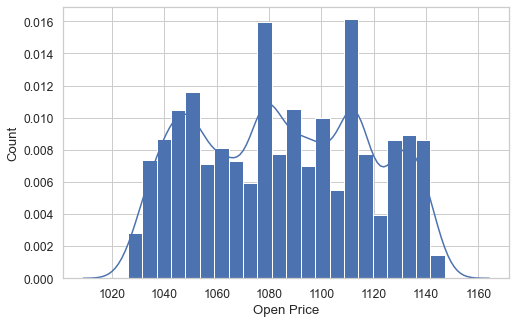

In [57]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt
# df = sns.load_dataset('iris')


# Open price distribution
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(data4['open'], norm_hist=False, kde=True, hist_kws={"alpha": 1}).set(xlabel='Open Price', ylabel='Count');

In [58]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7874 entries, 2020-08-31T09:15:00+0530 to 2020-09-28T15:29:00+0530
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   vwap                 7874 non-null   float64                              
 1   open                 7874 non-null   float64                              
 2   high                 7874 non-null   float64                              
 3   low                  7874 non-null   float64                              
 4   close                7874 non-null   float64                              
 5   volume               7874 non-null   float64                              
 6   date_new             7874 non-null   datetime64[ns, pytz.FixedOffset(330)]
 7   TICKER               7874 non-null   object                               
 8   TYPE                 7874 non-null   object       

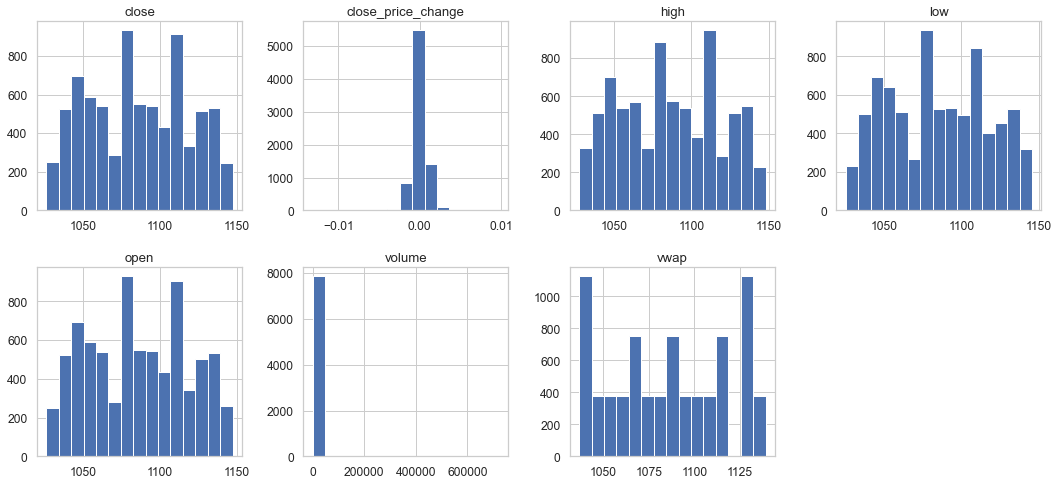

In [59]:
numerical = ['open', 'high', 'low', 'close', 'volume','close_price_change','vwap']
data4[numerical].hist(bins=15, figsize=(18, 8), layout=(2, 4));  

In [60]:
# Plot closing price

# plt.figure(figsize=(17, 8))
# plt.plot(data4.close)
# plt.title('Closing price')
# plt.ylabel('Closing price (INR)')
# plt.xlabel('Trading day')
# plt.grid(False)
# plt.show()  # check this graph by date 

In [61]:
data4.drop(['tm','year','month','day','week-year','prev_close_price','close_price_change2'],1,inplace=True)

In [62]:
data4['return']=data4['close_price_change']+0.1 # adjustment factor for negative returns  

In [63]:
data4['return'].describe()

count    7874.000000
mean        0.099991
std         0.000923
min         0.086857
25%         0.099522
50%         0.100000
75%         0.100453
max         0.109761
Name: return, dtype: float64

In [64]:
data4.head(3)

,vwap,open,high,low,close,volume,date_new,TICKER,TYPE,dt,month-year,close_price_change,rolling_mean_close,return
date,,,,,,,,,,,,,,
2020-08-31T09:15:00+0530,1125.676979,1125.20,1143.10,1125.2,1142.8,24947.0,2020-08-31 09:15:00+05:30,HDFCBANK,INTRADAY,2020-08-31,2020-08,0.00000,1142.8,0.10000
2020-08-31T09:16:00+0530,1125.676979,1143.25,1145.95,1141.5,1142.8,29617.0,2020-08-31 09:16:00+05:30,HDFCBANK,INTRADAY,2020-08-31,2020-08,0.00000,1142.8,0.10000
2020-08-31T09:17:00+0530,1125.676979,1143.55,1146.50,1143.0,1144.8,21551.0,2020-08-31 09:17:00+05:30,HDFCBANK,INTRADAY,2020-08-31,2020-08,0.00175,1144.8,0.10175


- For the rest of analysis, we will use the Closing Price which remarks the final price in which the stocks are traded by the end of the minute.

Text(0, 0.5, 'VWAP')

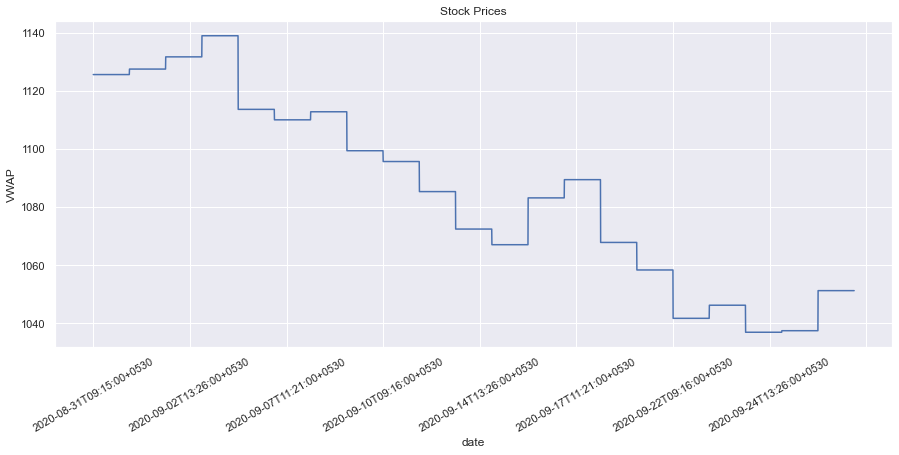

In [466]:
# plot VWAP variable   
data4['vwap'].plot(figsize=(15,6),title='Stock Prices')
plt.xticks(rotation=30)
plt.ylabel('VWAP')

There has been a steady decrease in Stock prices except for two lumps. We need to investigate it further

In [66]:
data4['close_price_change'].describe()

count    7874.000000
mean       -0.000009
std         0.000923
min        -0.013143
25%        -0.000478
50%         0.000000
75%         0.000453
max         0.009761
Name: close_price_change, dtype: float64

In [67]:
#Checking for missing values
data4.isnull().sum()

vwap                  0
open                  0
high                  0
low                   0
close                 0
volume                0
date_new              0
TICKER                0
TYPE                  0
dt                    0
month-year            0
close_price_change    0
rolling_mean_close    0
return                0
dtype: int64

### Decomposition

In [68]:
data = pd.read_csv('hdfcbank.csv', index_col=['date'], parse_dates=['date'])
data.head(5) 

,Unnamed: 0,open,high,low,close,volume,NA
date,,,,,,,
2020-08-31 09:15:00+05:30,0,1125.20,1143.10,1125.2,1142.80,24947,0
2020-08-31 09:16:00+05:30,1,1143.25,1145.95,1141.5,1142.80,29617,0
2020-08-31 09:17:00+05:30,2,1143.55,1146.50,1143.0,1144.80,21551,0
2020-08-31 09:18:00+05:30,3,1145.05,1148.00,1144.6,1145.95,13455,0
2020-08-31 09:19:00+05:30,4,1145.95,1147.00,1144.8,1145.75,8578,0


In [69]:
### Drop irrelevant columns 
data.drop(['Unnamed: 0','NA'],1,inplace=True)
data.head(3) 

,open,high,low,close,volume
date,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.8,24947
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.8,29617
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.8,21551


In [70]:
# return variable 
data['close_price_change2'] = data['close'].pct_change()
data['close_price_change2'] = data['close_price_change2'].replace([np.inf, -np.inf], np.nan)
data['close_price_change2'] = data['close_price_change2'].fillna(0)  
data['return']=data['close_price_change2']+(0.1) # adjustment factor for negative returns 

In [71]:
data['return'].describe()  # range = 0.08 to 0.1 

count    7874.000000
mean        0.099991
std         0.000923
min         0.086857
25%         0.099522
50%         0.100000
75%         0.100453
max         0.109761
Name: return, dtype: float64

[]

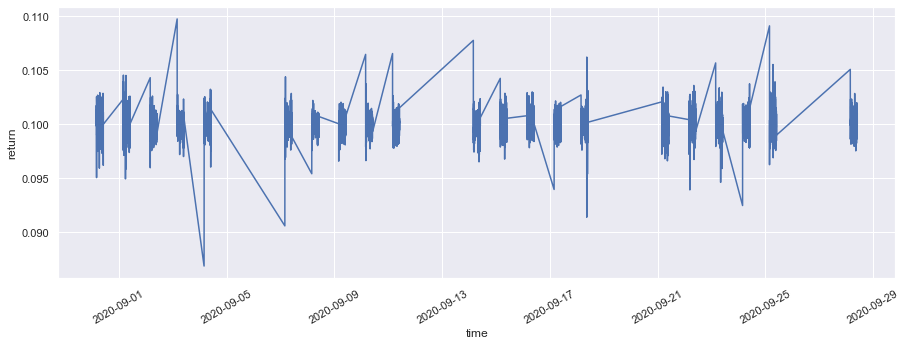

In [467]:
#visualizing timeseries data
import matplotlib.pyplot as plt
plt.plot(data['return'])
plt.xlabel('time')
plt.ylabel('return')
plt.xticks(rotation=30)
plt.plot()

In [73]:
# calculate percentiles for return variable 
data['return'].dropna().quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,1.0])

# 80% of the returns are less than 0.10 (insight)

0.0    0.086857
0.1    0.099000
0.2    0.099405
0.3    0.099634
0.4    0.099823
0.5    0.100000
0.6    0.100138
0.7    0.100332
0.8    0.100573
0.9    0.100953
1.0    0.109761
Name: return, dtype: float64

In [469]:
list(data.columns)

['open',
 'high',
 'low',
 'close',
 'volume',
 'close_price_change2',
 'return',
 'date',
 'year',
 'month',
 'day',
 'weekday',
 'dt',
 'tm']

In [473]:
cols=['open','high','low','close','volume','close_price_change2','return']

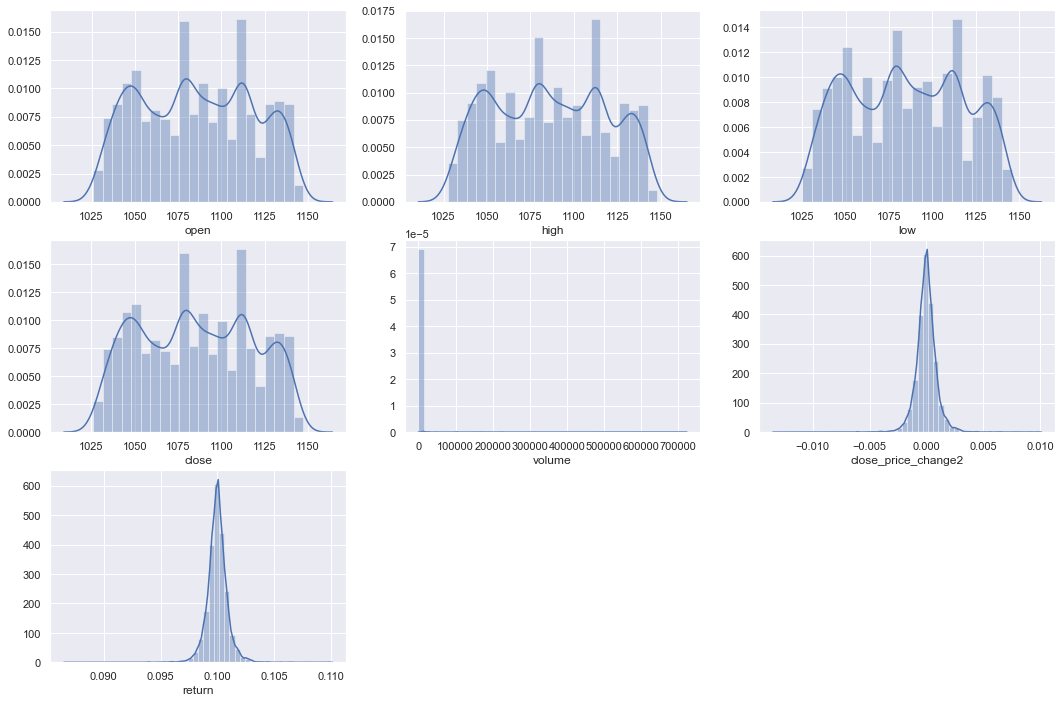

In [481]:
# Histograms

import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(18,12)) # 7 plots
fig.delaxes(ax= axes[2,1])
fig.delaxes(ax= axes[2,2]) # delete a subplot 

for i, column in enumerate(cols):
    sns.distplot(data[column],ax=axes[i//3,i%3])  

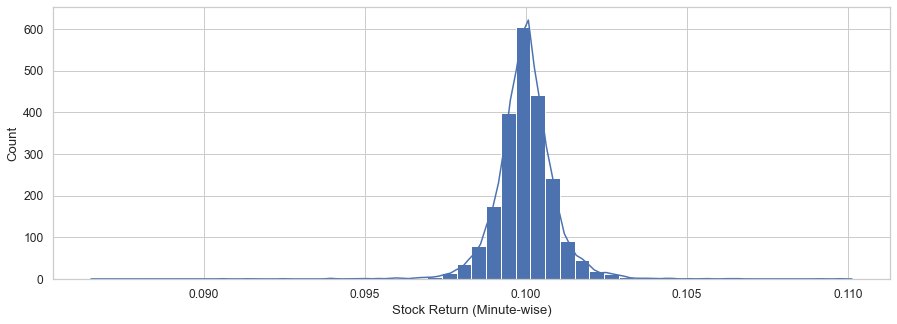

In [75]:
# Plot post-treatment Return variable

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})
sns.distplot(data['return'], norm_hist=False, kde=True, hist_kws={"alpha": 1}).set(xlabel='Stock Return (Minute-wise)', ylabel='Count');

### Assumptions for Time Series Forecasting

In [76]:
data.head(3)

,open,high,low,close,volume,close_price_change2,return
date,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.8,24947,0.00000,0.10000
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.8,29617,0.00000,0.10000
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.8,21551,0.00175,0.10175


In [77]:
type(data['return'])         

# https://otexts.com/fpp2/tspatterns.html

pandas.core.series.Series

### Decomposition 

- All time series data can be broken down into four core components: the average value, a trend (i.e. an increasing mean), seasonality (i.e. a repeating cyclical pattern), and a residual (random noise). Trends and seasonality are not always present in time dependent data. The residual is what’s left over after trends and seasonality are removed. 
- Time series models assume that the data is stationary and only the residual component satisfies the conditions for stationarity.

<Figure size 1080x360 with 0 Axes>

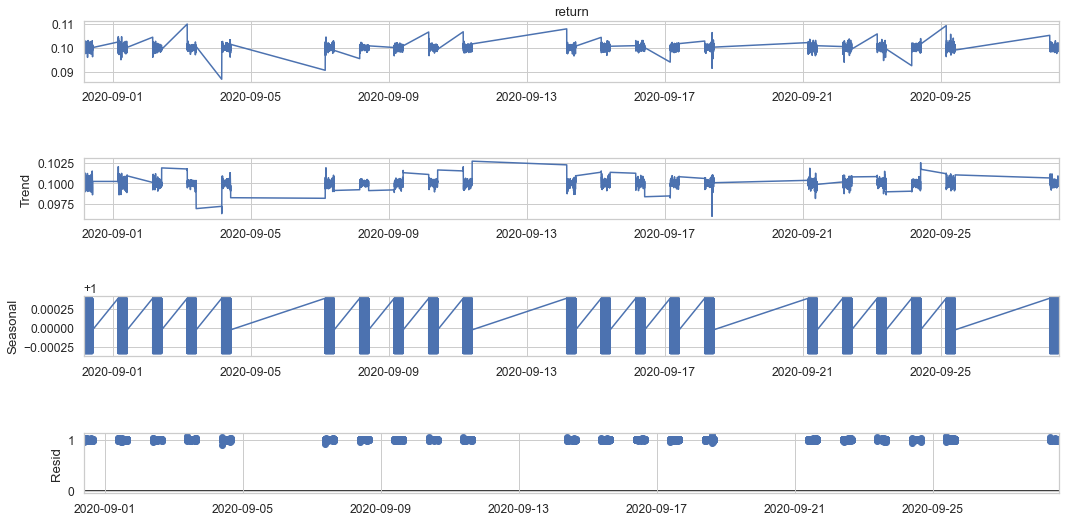

In [78]:
# Checking decomposition of trend, seasonality and residual of the original time series

# For seasonality included data, apply multiplicative 
    
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['return'], model='multiplicative', period=5) # period= (width) of the seasonality.”
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15,8)

# The seasonality’s amplitude is dependent on the level then you should use the multiplicative model.

# Seasonality curve shows that seasonality exists in our data; It repeats on a daily basis.

In [79]:
#  Reference link for seasonal_decompose function:-
# https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453

### Basic Assumptions of Time Series Forecasting

- The trend experiences some ups and downs as a stock return generally does. 
- It is seasonal as the seasonal component give any clearer picture. 
- The residuals’ variance seems to remain the same except for a few observations.

Stationarity: The first assumption is that the series are stationary. Essentially, this means that the series are normally distributed and the mean and variance are constant over a long time period.

Uncorrelated random error: We assume that the error term is randomly distributed and the mean and variance are constant over a time period. The Durbin-Watson test is the standard test for correlated errors.

No outliers: We assume that there is no outlier in the series. Outliers may affect conclusions strongly and can be misleading.

Random shocks (a random error component): If shocks are present, they are assumed to be randomly distributed with a mean of 0 and a constant variance.

### How to Check Stationarity of a Time Series?
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

- constant mean
- constant variance
- an autocovariance that does not depend on time.

#### If the above data is not stationary, then we have to follow the following steps to make it stationary.
https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/?

Differencing In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

where yt is the value at a time t

Applying differencing on our series and plotting the results:

1.1.1  How to make a Time Series Stationary?
Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:

Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.
The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

1.1.2  Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

## Stationarity 

In [80]:
# For ARIMA, time series has to be made stationary for further analysis.

### TS Plots 
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax) # autocorrelation function 
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax) # partial autocorrelation function 
        
        plt.tight_layout()  

In [81]:
#  Reference link for ACF/ PACF plot interpretation:-

# https://medium.com/@akshaysjbit/basic-of-autocovariance-autocorrelation-and-partial-autocorrelation-explained-47840b065b92

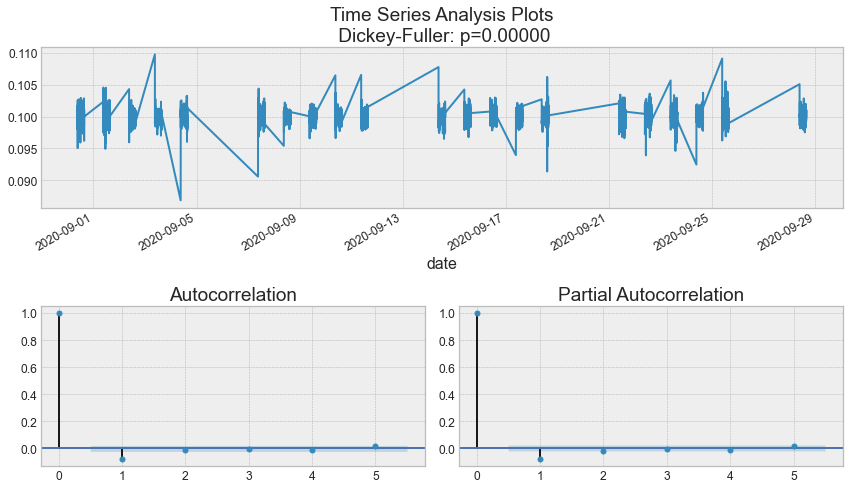

In [82]:
tsplot(data['return'], lags=5) # correlation of values with lag values (meaningful lags were observed till 5) 

In [83]:
# return1 = data['return']

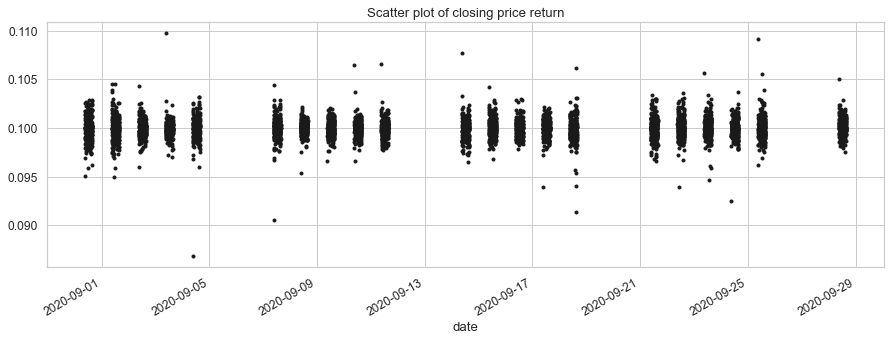

In [84]:
### Minute-wise Return distribution (plotted for each day)
data['return'].plot(style='k.')
plt.title('Scatter plot of closing price return')
plt.show()

- We can see that process appears to be random and centered about zero. The autocorrelation (ACF) and partial autocorrelation (PACF) plots also indicate no significant serial correlation. 

In [85]:
# Eliminating Trend and Seasonality:-

# 1. Differencing – taking the difference with a particular time lag  
# 2. Decomposition – modeling both trend and seasonality and removing them from the model.

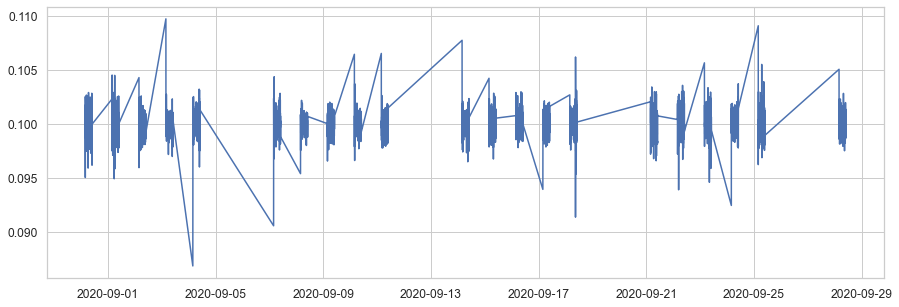

In [86]:
plt.plot(data['return'])

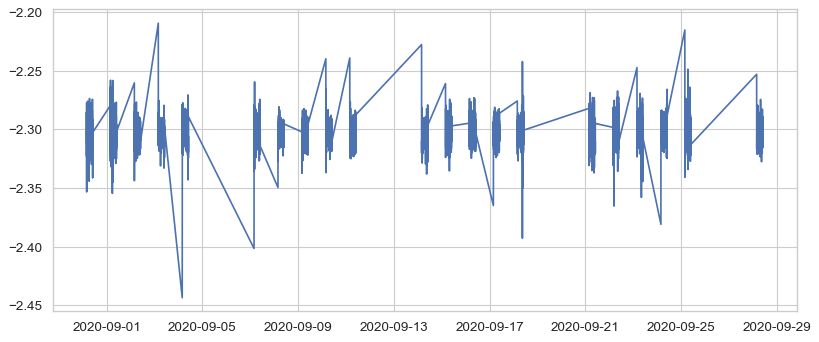

In [87]:
# Take Log of return variable and plot it  
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

ts_log = np.log(data['return']) 
plt.plot(ts_log)  

# Log results in the same distribution 

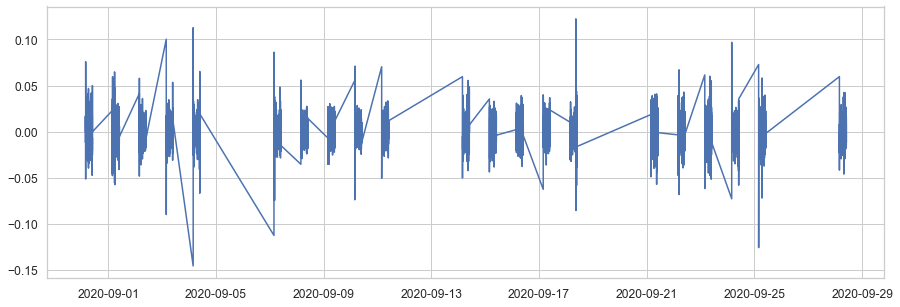

In [88]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

ts_log_diff.dropna(inplace=True)

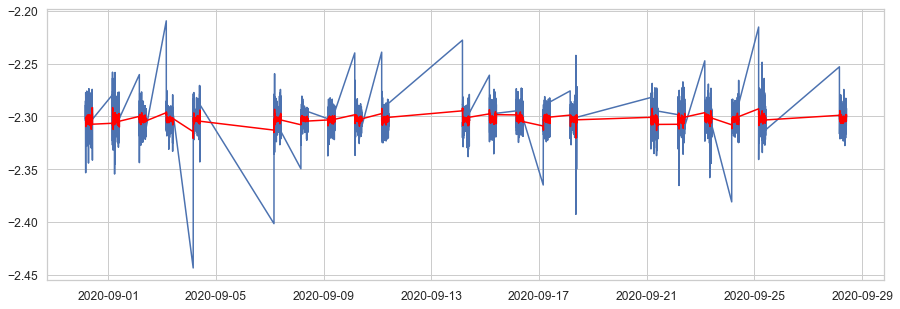

In [89]:
# Moving average (MA)

moving_avg=pd.Series(ts_log).rolling(window=12).mean()  

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [90]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12) 

# We will receive NaN for first 11 records  

date
2020-08-31 09:15:00+05:30         NaN
2020-08-31 09:16:00+05:30         NaN
2020-08-31 09:17:00+05:30         NaN
2020-08-31 09:18:00+05:30         NaN
2020-08-31 09:19:00+05:30         NaN
2020-08-31 09:20:00+05:30         NaN
2020-08-31 09:21:00+05:30         NaN
2020-08-31 09:22:00+05:30         NaN
2020-08-31 09:23:00+05:30         NaN
2020-08-31 09:24:00+05:30         NaN
2020-08-31 09:25:00+05:30         NaN
2020-08-31 09:26:00+05:30    0.027849
Name: return, dtype: float64

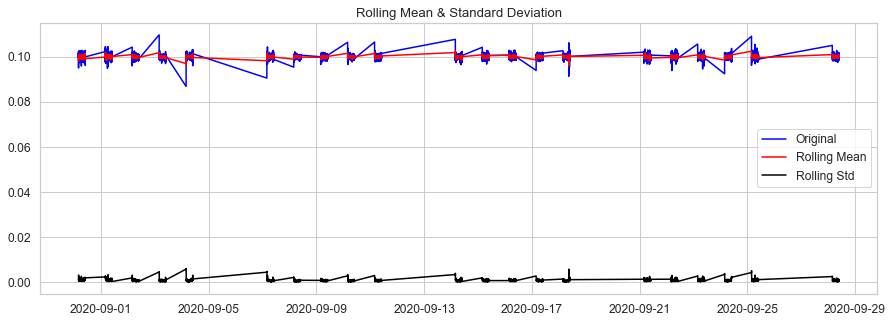

Results of Dickey-Fuller Test:
Test Statistic                  -95.935095
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    7873.000000
Critical Value (1%)              -3.431181
Critical Value (5%)              -2.861907
Critical Value (10%)             -2.566965
dtype: float64


In [91]:
# Plot Moving average, Moving SD & DF test on original return variable

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
#Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=5).mean()
    rolstd = pd.Series(timeseries).rolling(window=5).std()
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
#Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(data['return']) 

#Interpret the p-value and results of Dickey-Fuller Test

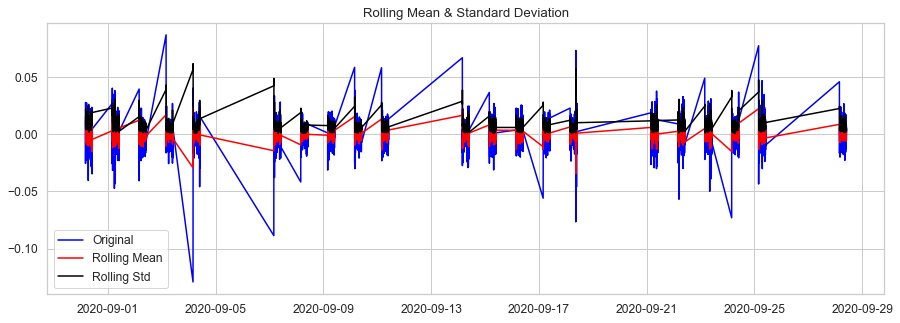

Results of Dickey-Fuller Test:
Test Statistic                  -23.406218
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    7826.000000
Critical Value (1%)              -3.431186
Critical Value (5%)              -2.861909
Critical Value (10%)             -2.566967
dtype: float64


In [92]:
# Plot Moving average, Moving SD & DF test on differenced return variable 

ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)  

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

In [93]:
# Exponentially weighted moving average:-

# Here weights are assigned to all the previous values with a decay factor.

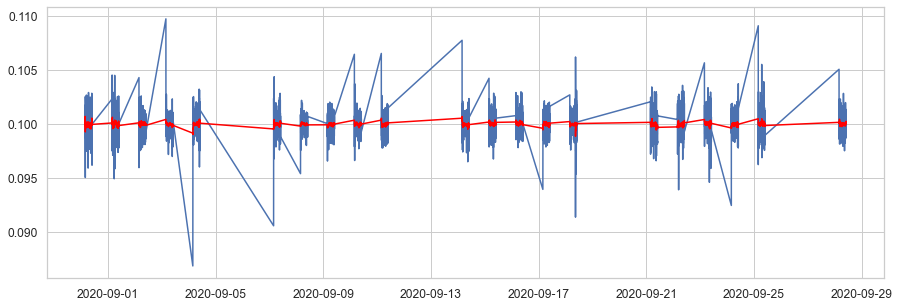

In [94]:
expwighted_avg = data['return'].ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(data['return'])
plt.plot(expwighted_avg, color='red')  

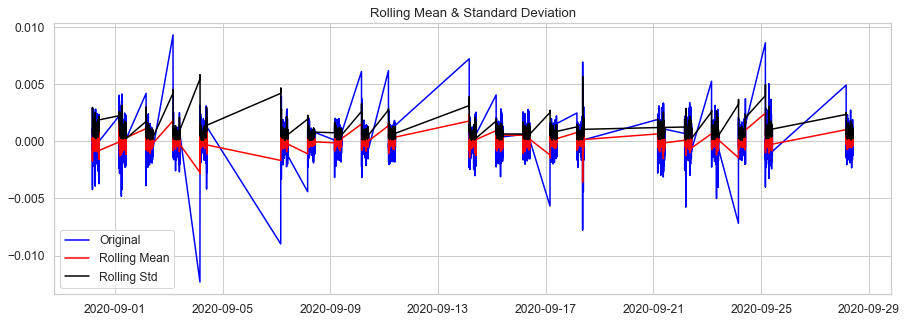

Results of Dickey-Fuller Test:
Test Statistic                  -20.133120
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    7837.000000
Critical Value (1%)              -3.431185
Critical Value (5%)              -2.861909
Critical Value (10%)             -2.566966
dtype: float64


In [95]:
ts_log_ewma_diff = data['return'] - expwighted_avg  
test_stationarity(ts_log_ewma_diff)  

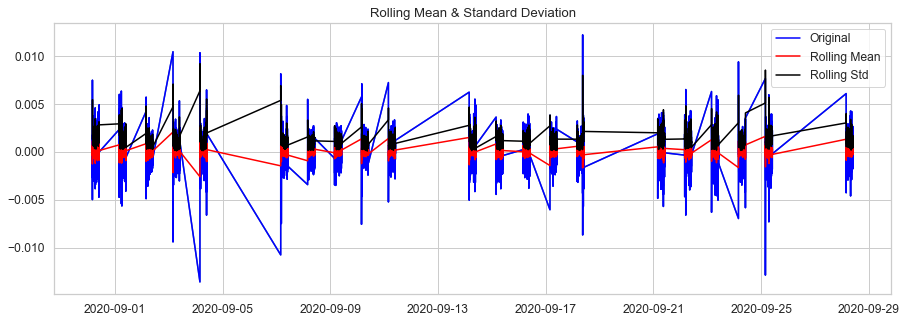

Results of Dickey-Fuller Test:
Test Statistic                  -24.585202
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    7836.000000
Critical Value (1%)              -3.431185
Critical Value (5%)              -2.861909
Critical Value (10%)             -2.566966
dtype: float64


In [96]:
# Differencing
ts_diff = data['return'] - data['return'] .shift()
plt.plot(ts_diff)
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

In [97]:
# Reference Link for Rolling Mean and Rolling SD interpretation:
# https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db  

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -37.803575
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.066824
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


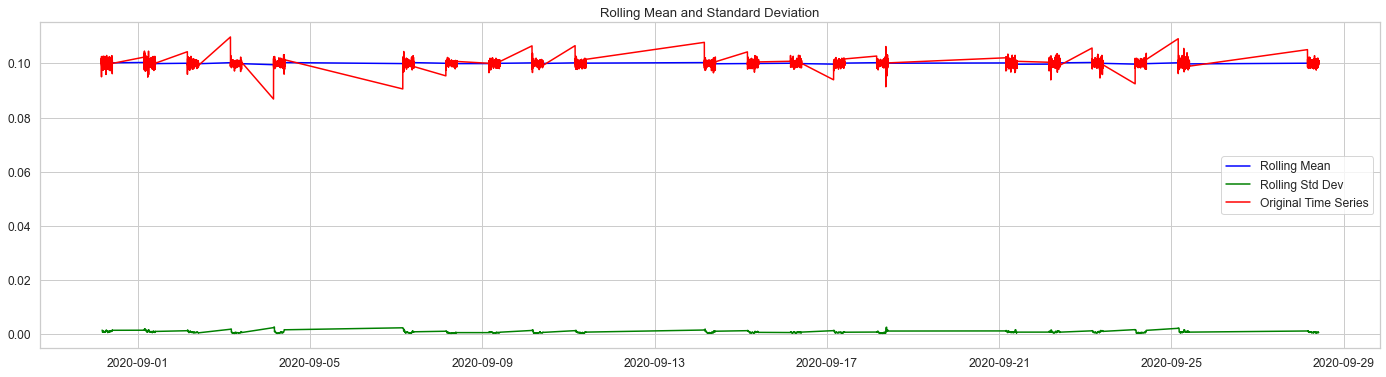

In [98]:
#Testing for stationarity using ADF (Augmented Dickey Fuller Test) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Tests.
  
import statsmodels 
  
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = statsmodels.tsa.stattools.kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['return'])

# Results of ADF and KPSS test are interpreted in reverse directions (ADF: P < 0.05 (Implies data is Stationary), KPSS: P > 0.05 (Implies data is Stationary))

We can see the rolling mean is not trending up and down over time as the return of the stock increases and decreases. 

- If p-value is < signif level (say 0.05), then the series is stationary (ADF test)
- If p-value is > signif level (say 0.05), then the series is stationary (KPSS test)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -94.241031
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.006256
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


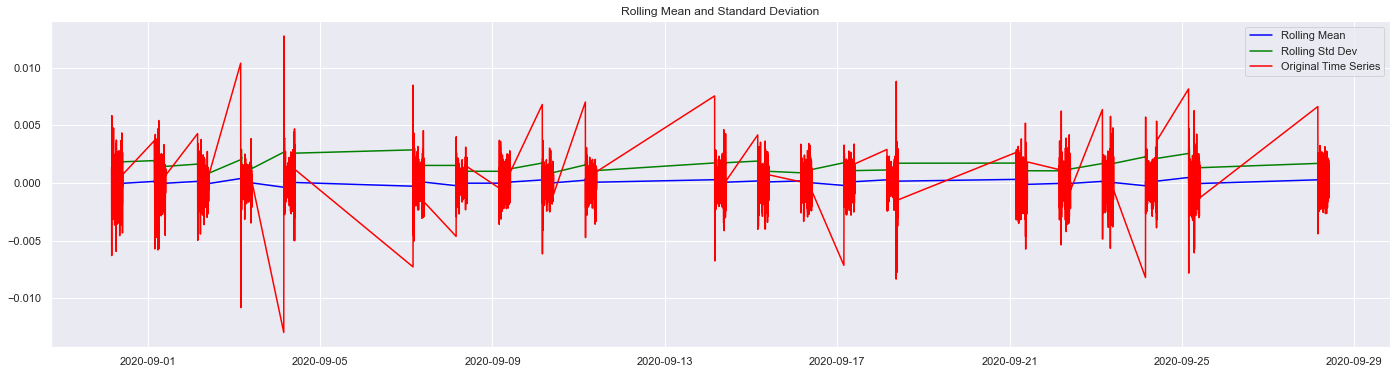

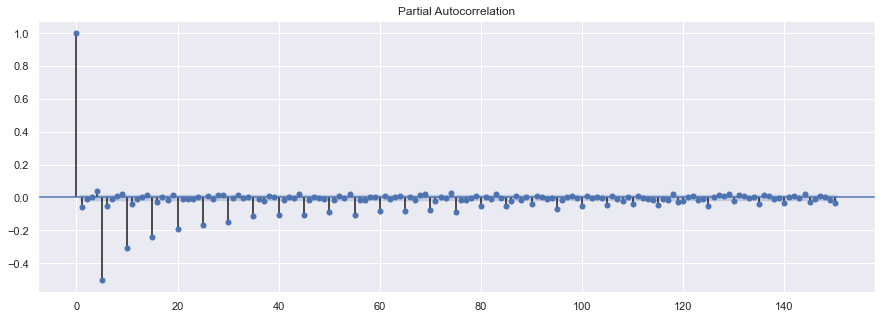

In [483]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.

# De-trending the time series using differencing 
data['return_detrend'] = (data['return'] - data['return'].shift(5))  

       
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

    
stationarity_test(data['return_detrend'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['return_detrend'].dropna(), lags=150)

### ACF and PACF
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

#### Autoregression Intuition:
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

#### Moving Average Intuition:
Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

Summary
From the autocorrelation plot we can tell whether or not we need to add MA terms. From the partial autocorrelation plot we know we need to add AR terms.

References:
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

- An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.
- A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags.
- Ideally, we want no correlation between the series and lags of itself. Graphically speaking, we would like all the spikes to fall in the blue region.

In [482]:
data.shape

(7874, 14)

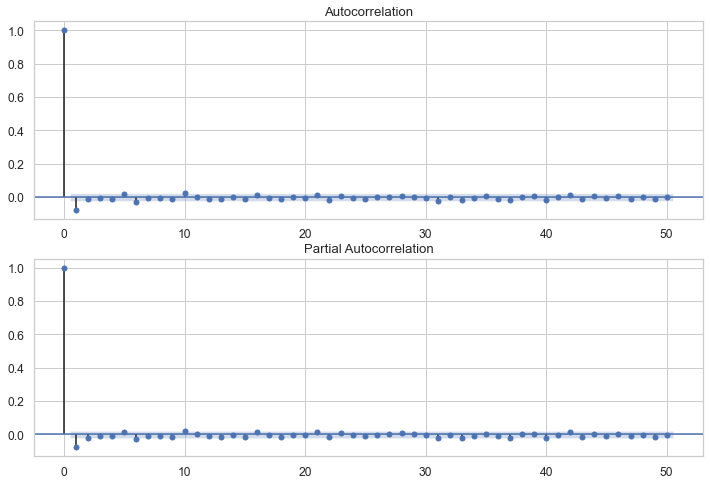

In [100]:
# ACF & PACF plot on original data 
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['return'], lags=50, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['return'], lags=50, ax=ax2)  
 
# By default, all lag values are printed, which makes the plot noisy.
# We can limit the number of lags on the x-axis to 50 to make the plot easier to read.

# Reference: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

- As we can see, there are several spikes above the blue region, meaning there are correlations at lags 1,5,6,10

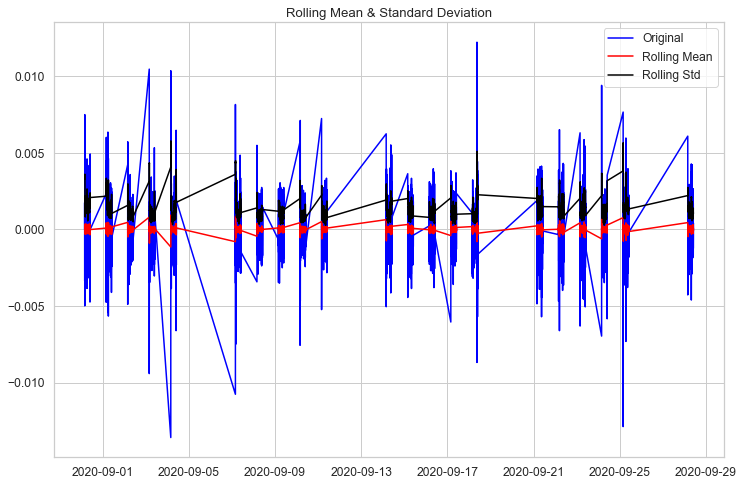

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -33.674899
p-value                           0.000000
#Lags Used                       20.000000
Number of Observations Used    7852.000000
Critical Value (1%)              -3.431183
Critical Value (5%)              -2.861908
Critical Value (10%)             -2.566966
dtype: float64


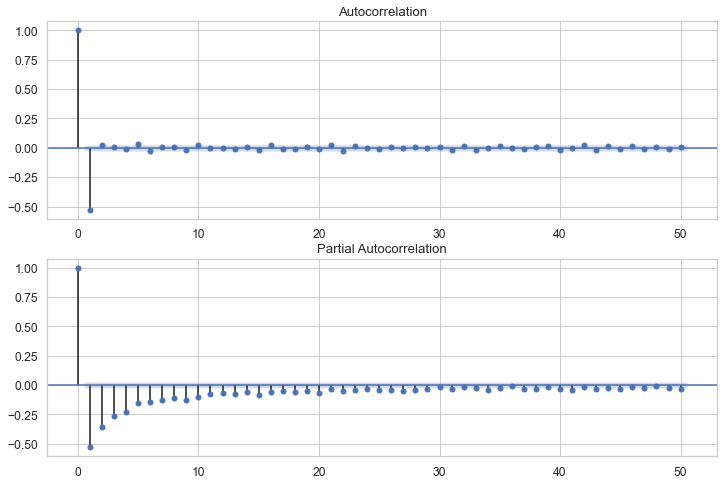

In [101]:
### ACF, PACF plots on transformed data   
first_diff = data['return'] - data['return'].shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=50, ax=ax2)  

After differencing, the p-value is extremely small. Thus this series is very likely to be stationary.

In [102]:
#ACF and PACF plots to estimate p,q values  
from statsmodels.tsa.stattools import acf, pacf

In [103]:
lag_acf = acf(first_diff, nlags=50)
lag_pacf = pacf(first_diff, nlags=50, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function Plot')

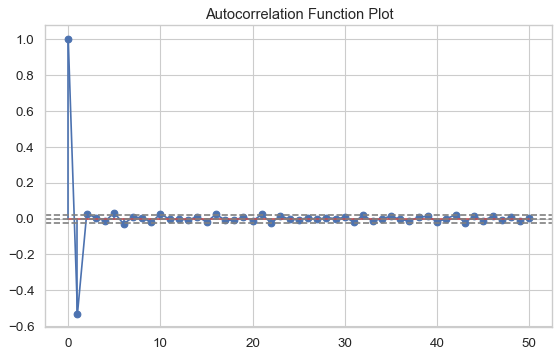

In [104]:
#Plot ACF: 

from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121) 
plt.plot(lag_acf)
plt.stem(lag_acf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation Function Plot')
  
# The axhline() function in pyplot module of matplotlib library is used to add a horizontal line across the axis.

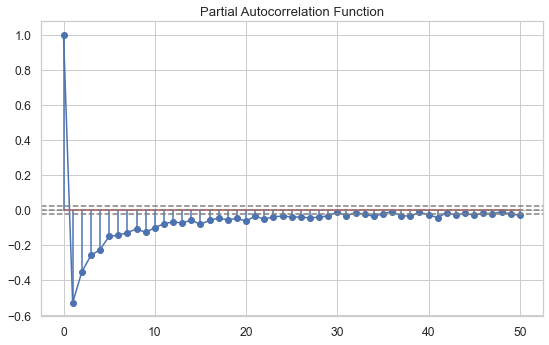

In [105]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)

plt.stem(lag_pacf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation Function')
plt.tight_layout()

- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.
- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

In [106]:
# Reference link for ACF/ PACF interpretation:-

# https://medium.com/@chidindego/time-series-analysis-for-energy-generation-b71a07302684

# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python 

## Time Series Forecasting Methods 

- Exponential smoothings methods are appropriate for non-stationary data (ie data with a trend and seasonal data).
- ARIMA models should be used on stationary data only. 
- One should therefore remove the trend of the data (via deflating or logging), and then look at the differenced series.

An ARIMA model is often noted ARIMA(p, d, q) where p represents the order of the AR part, d the order of differencing (“I” part), and q the order of the MA term.

### 1) Choosing the differencing order

The first step of fitting an ARIMA model is to determine the differencing order to stationarize the series. 
To do that, we look at the ACF and PACF plots, and keep in mind these two rules:
- Rule 1 : If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.
- Rule 2 : If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.”

In [107]:
data.head(3)

,open,high,low,close,volume,close_price_change2,return,return_detrend
date,,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.8,24947,0.00000,0.10000,NaN
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.8,29617,0.00000,0.10000,NaN
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.8,21551,0.00175,0.10175,NaN


Text(0.5, 1.0, 'Returns')

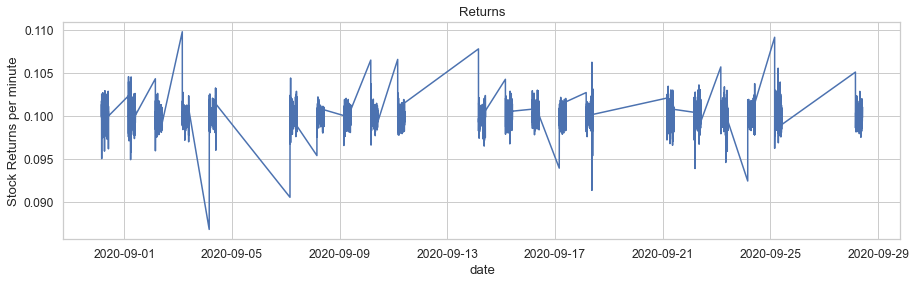

In [108]:
# Plot of returns generated over the time period
plt.figure(figsize=(15,4))
plt.plot(data['return'])
plt.xlabel('date')
plt.ylabel('Stock Returns per minute')
plt.title('Returns')

In [109]:
# shortcut to find and replace (Esc+F)

# The strptime() method creates a datetime object from the given string:-
# https://www.programiz.com/python-programming/datetime/strptime

In [110]:
# Print Current date and time 
import datetime
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))  

2020-10-29 04:09:00


In [111]:
### Convert string date to normal datetime:-

## Method-1
from datetime import datetime

date_time_str = '18/09/19 01:55:19'
date_time_obj = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')

print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)

# The strptime() method creates a datetime object from the given string 

## Method-2
date_time_str2=pd.to_datetime(date_time_str)
date_time_str2  

The type of the date is now <class 'datetime.datetime'>
The date is 2019-09-18 01:55:19


Timestamp('2019-09-18 01:55:19')

In [112]:
# create new columns using datetime variable      
data['date_new'] = data.index  

import datetime

data['dt'] = data['date_new'].dt.date
data['tm'] = data['date_new'].dt.time

data['day'] = data['date_new'].dt.day
data['month'] = data['date_new'].dt.month
data['month_new'] = data['date_new'].dt.strftime('%b')
data['year'] = data['date_new'].dt.year

data['week-year'] = data['date_new'].dt.strftime('%Y-%U')
data['month-year'] = data['date_new'].dt.strftime('%Y-%m')    

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7874 entries, 2020-08-31 09:15:00+05:30 to 2020-09-28 15:29:00+05:30
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   open                 7874 non-null   float64                              
 1   high                 7874 non-null   float64                              
 2   low                  7874 non-null   float64                              
 3   close                7874 non-null   float64                              
 4   volume               7874 non-null   int64                                
 5   close_price_change2  7874 non-null   float64                              
 6   return               7874 non-null   float64                              
 7   return_detrend       7844 non-null   float64                              
 8   date_new             7874 non-null   dat

In [114]:
data.head(3)

,open,high,low,close,volume,close_price_change2,return,return_detrend,date_new,dt,tm,day,month,month_new,year,week-year,month-year
date,,,,,,,,,,,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.8,24947,0.00000,0.10000,NaN,2020-08-31 09:15:00+05:30,2020-08-31,09:15:00,31,8,Aug,2020,2020-35,2020-08
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.8,29617,0.00000,0.10000,NaN,2020-08-31 09:16:00+05:30,2020-08-31,09:16:00,31,8,Aug,2020,2020-35,2020-08
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.8,21551,0.00175,0.10175,NaN,2020-08-31 09:17:00+05:30,2020-08-31,09:17:00,31,8,Aug,2020,2020-35,2020-08


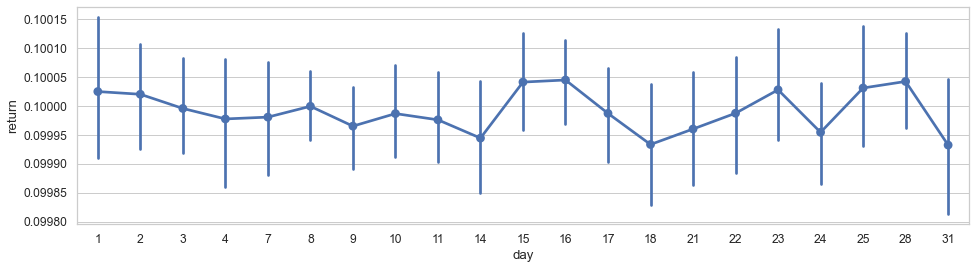

In [115]:
# Line plot (Day-wise Return)
plt.figure(figsize=(16,4))
sns.pointplot(x='day',y='return',data=data) # day wise 

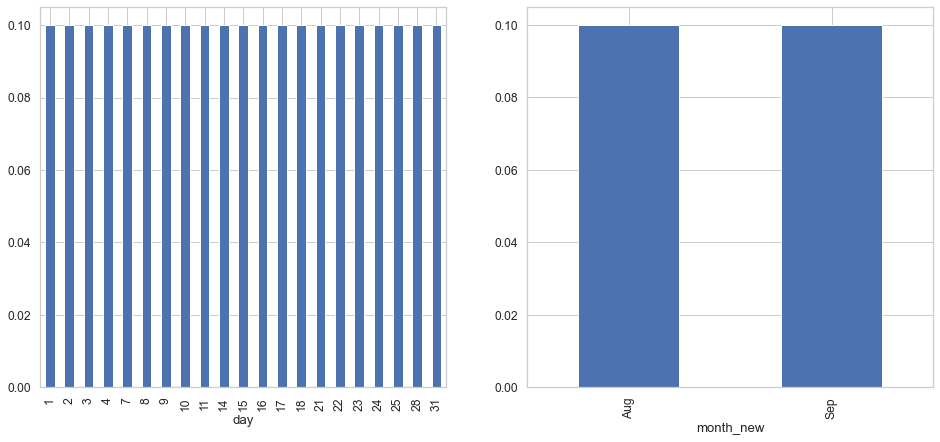

In [116]:
# Observe the daily and monthly pattern in returns

plt.figure(figsize=(16,7))
plt.subplot(121)
data.groupby('day')['return'].mean().plot.bar()
plt.subplot(122)
data.groupby('month_new')['return'].mean().plot.bar()

### Decompose Time Series Data

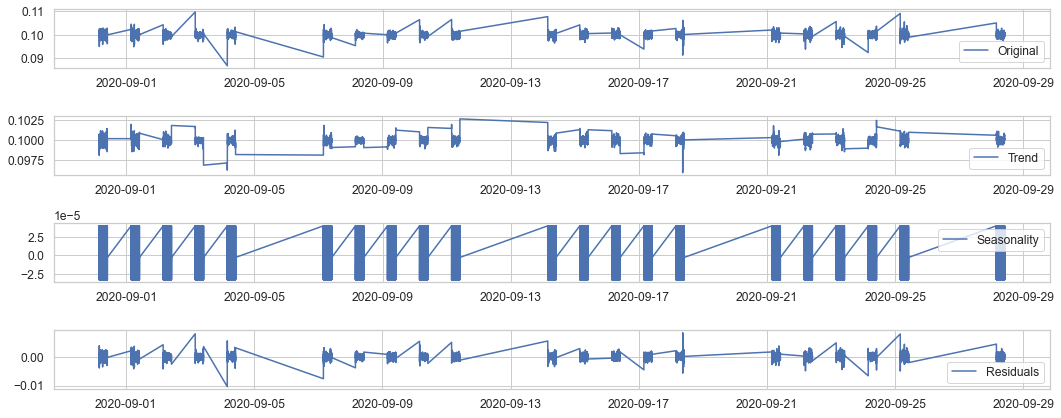

In [117]:
# Decompose our time series data to check for trend, seasonality, and residuals.

# frequency is in seasonal_decompose() - It is the property of your data. So if you collected your data minute by minute, 
# then it has minute frequency.

# Indexing the datetime data type
data.sort_index(inplace= True)

decompose = data[["date_new", "return"]]
decompose.index = data["date_new"]
decompose = data[["return"]]

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose, freq=5) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15, 6))
plt.subplot(411)
plt.plot(data["return"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

From the above plot, our data obviously doesn’t follow a defined trend, which is a good feature for data stationarity. But, also, it shows a seasonal pattern over the years.

In [118]:
decompose.head(5)

,return
date,
2020-08-31 09:15:00+05:30,0.100000
2020-08-31 09:16:00+05:30,0.100000
2020-08-31 09:17:00+05:30,0.101750
2020-08-31 09:18:00+05:30,0.101005
2020-08-31 09:19:00+05:30,0.099825


In [119]:
# !pip install chart_studio

In [120]:
import chart_studio.plotly as py
import cufflinks as cf

In [121]:
decompose.index = pd.to_datetime(decompose.index)

In [122]:
pd.plotting.register_matplotlib_converters()

### Sampling 

In [123]:
# Splitting data into training and test data (70%-30%)

import pandas as pd

df1 = decompose
df1['date_new'] = df1.index 

df1['dt'] = df1['date_new'].dt.date
df1['tm'] = df1['date_new'].dt.time

x_train = df1[df1['dt'] < pd.Timestamp('2020-09-20')]
x_test = df1[df1['dt'] >= pd.Timestamp('2020-09-20')]

print(x_train.shape,x_test.shape)

(5624, 4) (2250, 4)


In [485]:
df1.head()

,return,date_new,dt,tm
date,,,,
2020-08-31 09:15:00+05:30,0.100000,2020-08-31 09:15:00+05:30,2020-08-31,09:15:00
2020-08-31 09:16:00+05:30,0.100000,2020-08-31 09:16:00+05:30,2020-08-31,09:16:00
2020-08-31 09:17:00+05:30,0.101750,2020-08-31 09:17:00+05:30,2020-08-31,09:17:00
2020-08-31 09:18:00+05:30,0.101005,2020-08-31 09:18:00+05:30,2020-08-31,09:18:00
2020-08-31 09:19:00+05:30,0.099825,2020-08-31 09:19:00+05:30,2020-08-31,09:19:00


In [492]:
# x='2020-08-31'
# df1[df1['dt']==dt.x]

In [124]:
columns = ['date_new', 'dt','tm']

x_train.drop(columns, inplace=True, axis=1)
x_test.drop(columns, inplace=True, axis=1)

In [125]:
x_train.head(5)

,return
date,
2020-08-31 09:15:00+05:30,0.100000
2020-08-31 09:16:00+05:30,0.100000
2020-08-31 09:17:00+05:30,0.101750
2020-08-31 09:18:00+05:30,0.101005
2020-08-31 09:19:00+05:30,0.099825


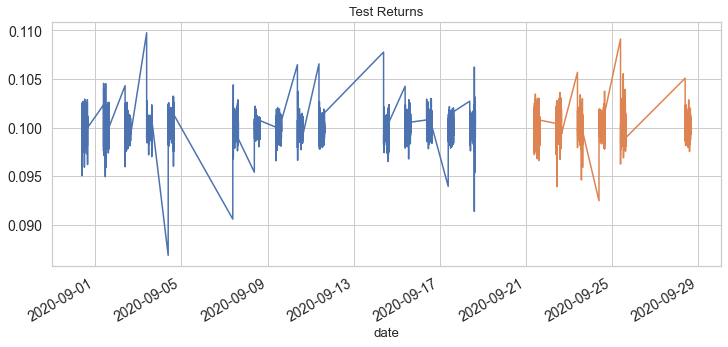

In [126]:
#Plotting data
x_train['return'].plot(figsize=(12,5), title= 'Train Returns', fontsize=14)
x_test['return'].plot(figsize=(12,5), title= 'Test Returns', fontsize=14)
plt.show()

### Assumption Checks

ARIMA forecasting models assume time series is stationary (series is independent of time). Running an Augmented Dickey-Fuller (ADF) helps confirm stationarity

In [127]:
# Test for Stationarity
def stationary_test(data):
    dftest = adfuller(data['return'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
#     plt.plot(data.index, data['return'])
stationary_test(x_train)

Test Statistic                  -79.379908
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    5623.000000
Critical Value (1%)              -3.431513
Critical Value (5%)              -2.862054
Critical Value (10%)             -2.567044
dtype: float64


<Figure size 1152x504 with 0 Axes>

In [128]:
x_train.head(3)

,return
date,
2020-08-31 09:15:00+05:30,0.10000
2020-08-31 09:16:00+05:30,0.10000
2020-08-31 09:17:00+05:30,0.10175


In [129]:
x_train['return'][0:2] # pull first two records 

date
2020-08-31 09:15:00+05:30    0.1
2020-08-31 09:16:00+05:30    0.1
Name: return, dtype: float64

In [130]:
# Transformation of data using Boxcox

from scipy import stats

box_cox_train = stats.boxcox(x_train['return'])[0]
box_cox_train = pd.DataFrame(data=box_cox_train)
box_cox_train.index = x_train.index
box_cox_train.columns = ['return']
stationary_test(box_cox_train)  

Test Statistic                  -55.804029
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    5622.000000
Critical Value (1%)              -3.431514
Critical Value (5%)              -2.862054
Critical Value (10%)             -2.567044
dtype: float64


<Figure size 1152x504 with 0 Axes>

### AR Model 

The predictors depend on the parameters (p,d,q) of the ARIMA model:
        
- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

RMSE: 0.0009566834937744823
MSE: 9.1524330726055e-07
MAE: 0.0006760591317569452
MAPE: 0.6756399254341344 %


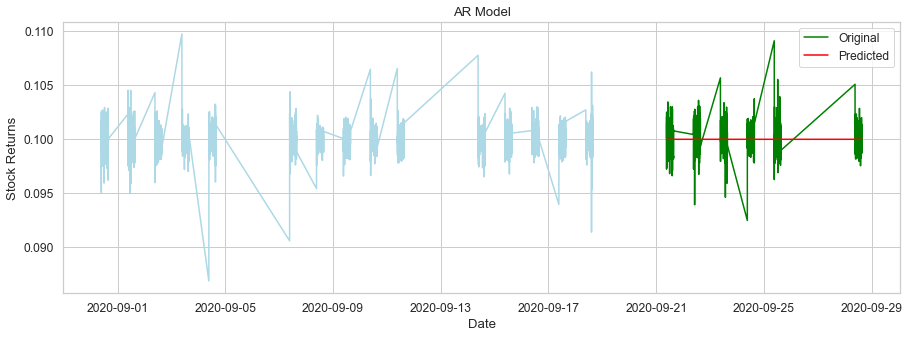

In [131]:
# AR Model 

# fit on train and forecast on test   

## AR Model p=1, d=0, q=0 
model = ARIMA(x_train, order=(1, 0, 0))  
results_AR = model.fit(disp=-1)  

plt.figure(figsize=(15, 5))
plt.plot(x_train.index, x_train['return'].values, color="lightblue")
plt.plot(x_test.index, x_test['return'].values, color="green",label='Original')

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["return"]
pred.index = x_test.index

## Converting from log to normal value (forecasted return)
# pred["return"] = pred["return"].apply(lambda x: math.exp(x)-1)

## Measuring error (Model KPIs). 
RMSE = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
MSE = mean_squared_error(x_test.values,pred.values)
MAE = mean_absolute_error(x_test.values,pred.values)
MAPE = float(sum(abs((x_test.values - pred.values)/(x_test.values)) * 100)/len(x_test))

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('MAPE: {} %'.format(MAPE))
plt.plot(pred.index, pred.fillna(0).values, color="red",label='Predicted')

plt.xlabel('Date')
plt.ylabel('Stock Returns')
plt.title('AR Model')
plt.legend()    

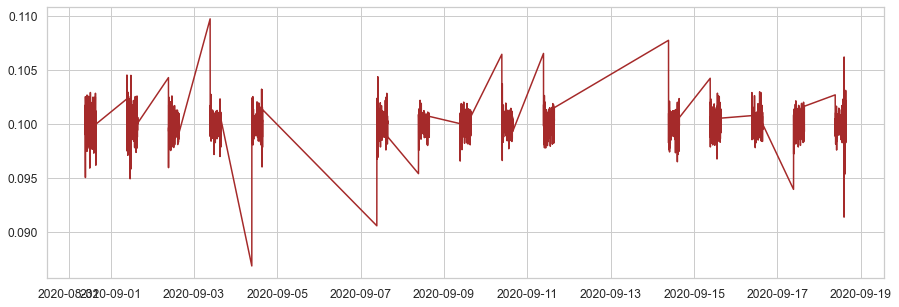

In [132]:
plt.figure(figsize=(15, 5))
plt.plot(x_train.index, x_train['return'].values, color="brown")

- The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases:

Text(0.5, 1.0, 'RSS: 1.0421')

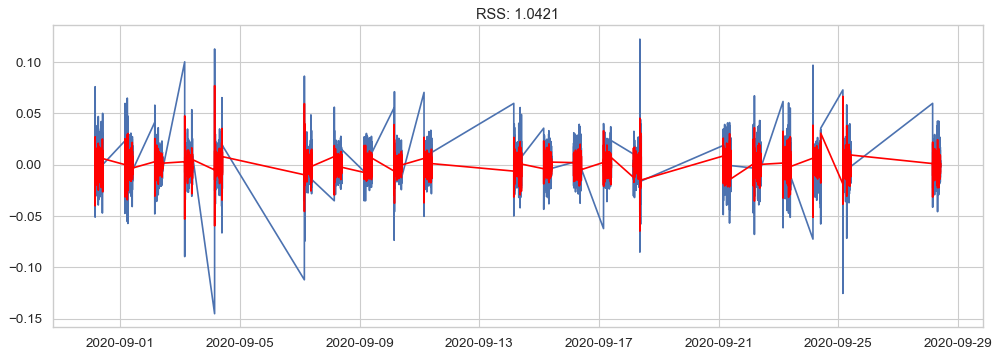

In [133]:
from statsmodels.tsa.arima_model import ARIMA 
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

model = ARIMA(ts_log_diff, order=(1, 0, 0))  # # p=2,d=1,q=0 (AR model)
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))  

### MA Model 

RMSE: 0.000956688212920259
MSE: 9.152523367405589e-07
MAE: 0.0006760613374224265
MAPE: 0.6756420755669228 %


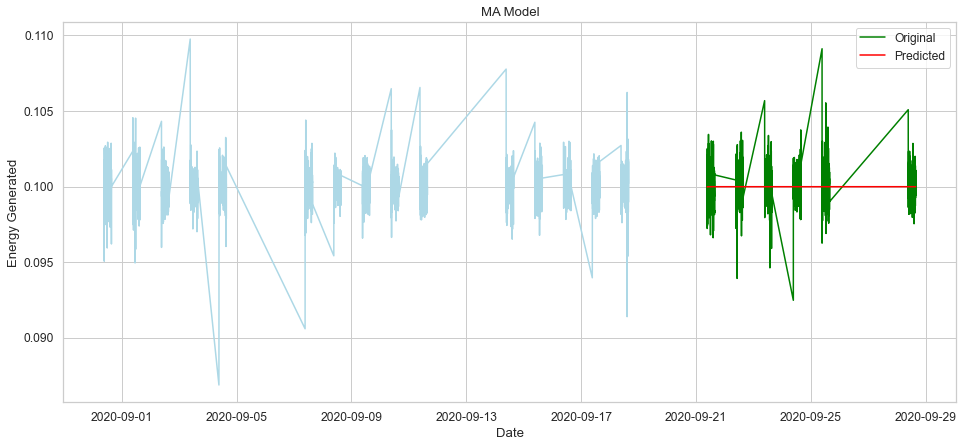

In [134]:
## MA Model p=0, d=0, q=1      

model = ARIMA(x_train, order=(0, 0, 1))  
results_AR = model.fit()    

plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green",label='Original')

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["return"]
pred.index = x_test.index

## Converting from log to normal value
# pred["return"] = pred["return"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
RMSE = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
MSE = mean_squared_error(x_test.values,pred.values)
MAE = mean_absolute_error(x_test.values,pred.values)
MAPE = float(sum(abs((x_test.values - pred.values)/(x_test.values)) * 100)/len(x_test))

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('MAPE: {} %'.format(MAPE))
plt.plot(pred.index, pred.fillna(0).values, color="red",label='Predicted')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.title('MA Model')
plt.legend()

### Moving Average Model 

In [135]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

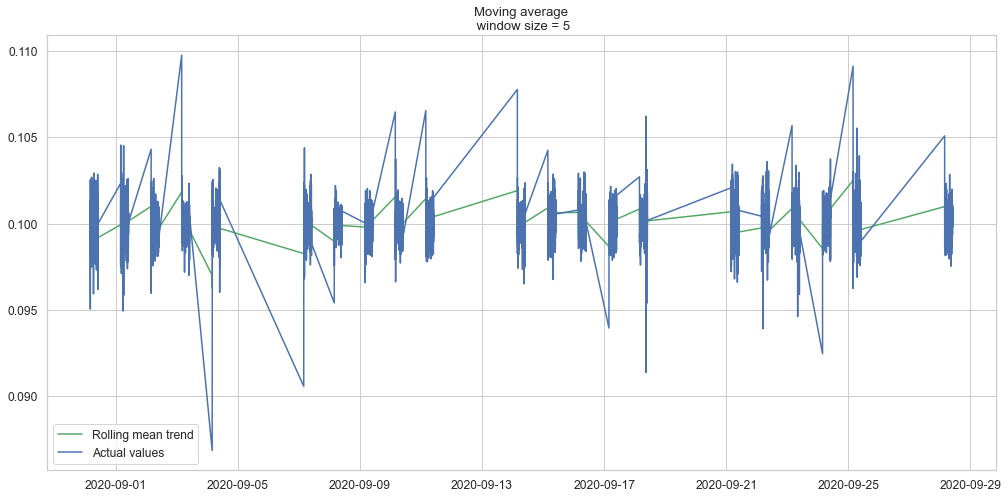

In [136]:
#Smooth by the previous 5 days (by week)
plot_moving_average(data['return'], 5)

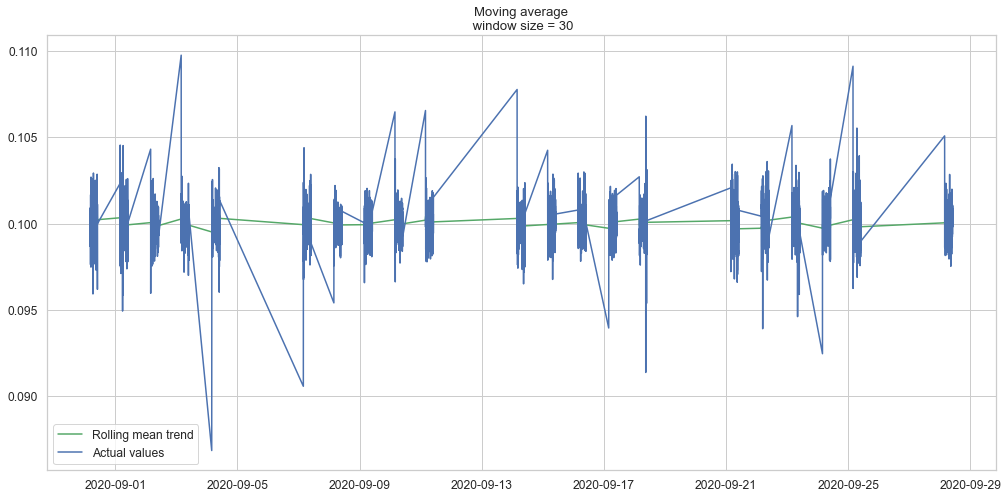

In [137]:
#Smooth by the previous month (30 days)
plot_moving_average(data['return'],30)

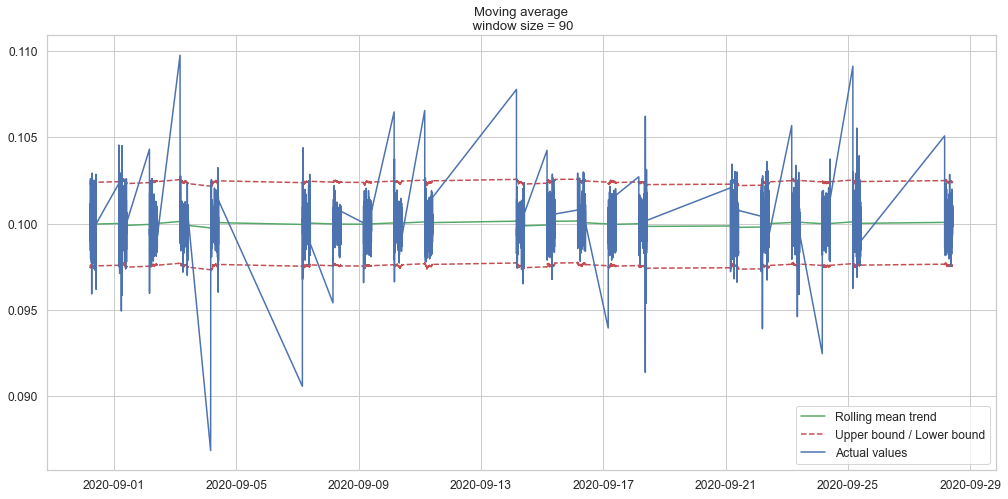

In [138]:
#Smooth by previous quarter (90 days)
plot_moving_average(data['return'], 90, plot_intervals=True) 

### ARIMA Model 

- ARIMA stands for Autoregressive Integrated Moving Average and it depends on three key variables p, d, q to be successful.
- ARIMA depend on the values p, d, q

p = number of lags, AR terms

d = order of differencing

q = number of lagged forecast errors, MA terms

- To forecast the returns, we can use smoothing methods and ARIMA methods. 
- Smoothing methods can be used for non-stationary data whereas ARIMA requires the time series to be stationary. 
- We can also make use of auto_arima, which makes the series stationary and determines the optimal order for the ARIMA model.
- For each of the methods, we will perform multiple fits for the optimization of the hyperparameters and use the optimal values for the final model.

### Auto-Regressive Integrated Moving Average (ARIMA)

- ARIMA model is a combination of Auto-Regressive model and Moving Average model along with the Integration of differencing. 
- Auto-Regressive model determines the relationship between an observation and a certain number of lagged observations. 
- The Integrated part is the differencing of the actual observations to make the time series stationary. 
- Moving Average determines the relationship between an observation and residual error obtained by using a moving average model on the lagged observations.

- Auto-Regressive (p) -> Number of lag observations in the model. Also called as the lag order.
- Integrated (d) -> The number of times the actual observations are differenced for stationarity. Also called as the degree of differencing.
- Moving Average (q) -> Size of the moving average window. Also called as the order of moving average.

Its time to choose parameters p,q,d for ARIMA model. Last time we chose the value of p,d, and q by observing the plots of ACF and PACF but now we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

Auto ARIMA: Automatically discover the optimal order for an ARIMA model. The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima. The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

### How to determine p, d, q
It's easy to determin I. In our case, we see the first order differencing make the ts stationary. I = 1.

AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 6 lags the AR is significant. Which means, we can use ** AR = 6**

To avoid the potential for incorrectly specifying the MA order (in the case where the MA is first tried then the MA order is being set to 0), it may often make sense to extend the lag observed from the last significant term in the PACF.

What is interesting is that when the AR model is appropriately specified, the the residuals from this model can be used to directly observe the uncorrelated error. This residual can be used to further investigate alternative MA and ARMA model specifications directly by regression.

Assuming an AR(s) model were computed, then I would suggest that the next step in identification is to estimate an MA model with s-1 lags in the uncorrelated errors derived from the regression. The parsimonious MA specification might be considered and this might be compared with a more parsimonious AR specification. Then ARMA models might also be analysed.

ARIMA makes much more sense to me now. ACF and PACF are useful to determine the p, d, q. And each test is indeed helping me to justify whether I'm getting a better model or worse one.

Pros:

Intepretability: Each coefficient means a specific thing
ts key elements understanding: the concept of lags, and error lag terms are very unique, ARIMA gave a comprehensive cover on them. So even in the future I want to try some other regression model. I would add the lag terms and consider the error term.

Cons:

Inefficiency: ARIMA needs to be run on each time series,in case we have 500 store/item combinations, it needs to run 500 times. Every time we want to forecast the future, say on Jan 2, 2018, we want to forecast next 90 days. We need to re-run ARIMA.

To forecast the prices, we can use smoothing methods and ARIMA methods. Smoothing methods can be used for non-stationary data whereas ARIMA requires the time series to be stationary. We can also make use of auto_arima, which makes the series stationary and determines the optimal order for the ARIMA model.
For each of the methods, we will perform multiple fits for the optimization of the hyperparameters and use the optimal values for the final model.

In [139]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [140]:
x_train.head(5)

,return
date,
2020-08-31 09:15:00+05:30,0.100000
2020-08-31 09:16:00+05:30,0.100000
2020-08-31 09:17:00+05:30,0.101750
2020-08-31 09:18:00+05:30,0.101005
2020-08-31 09:19:00+05:30,0.099825


In [141]:
timeseries = x_train["return"]

In [142]:
print("p-value:", adfuller(timeseries.dropna())[1])

p-value: 0.0


- The p-value is less than the significance level 0.05 so it is stationary and differencing is not needed

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


1


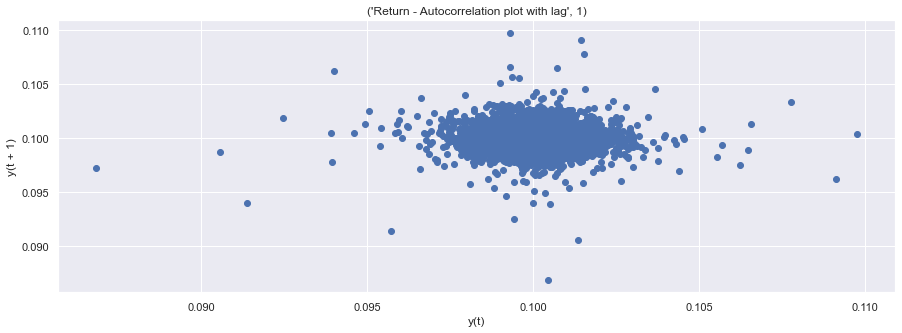

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


2


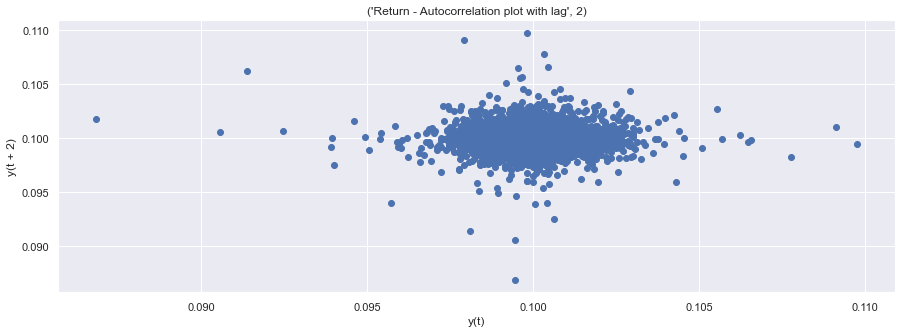

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


3


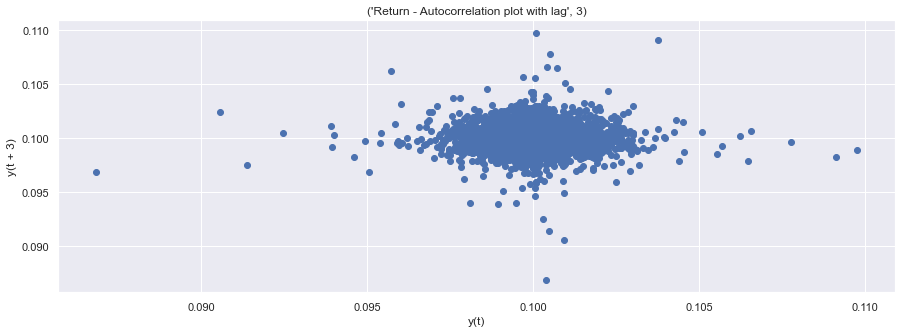

In [143]:
# Before building the ARIMA model, let’s see if there is some cross-correlation in our data.
for i in range(1,4):
    plt.figure()
    pd.plotting.lag_plot(data['return'], lag=i)
    plt.title(('Return - Autocorrelation plot with lag',i))
    print(i)
    plt.show()

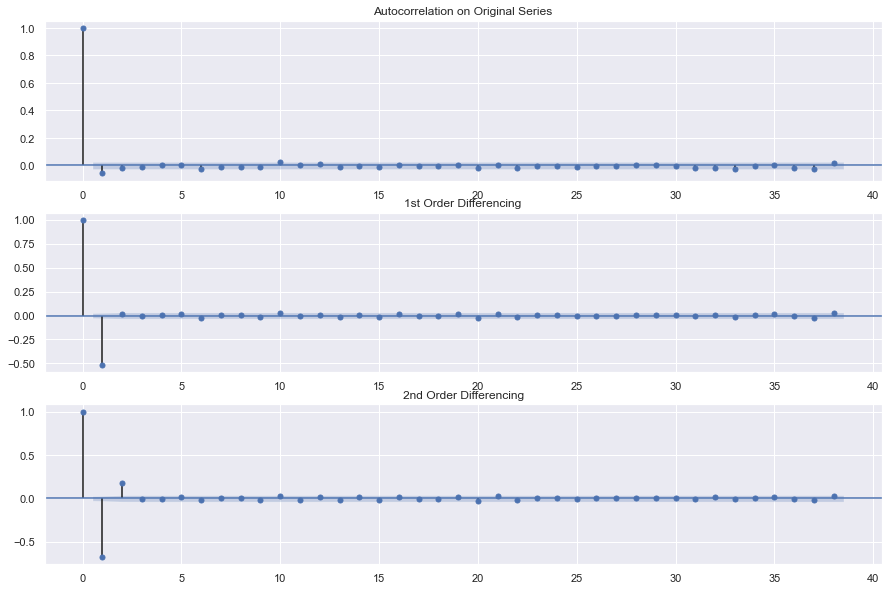

In [144]:
### Find out the Order of Differencing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(311)
fig = plot_acf(timeseries, ax=ax1,
               title="Autocorrelation on Original Series") 

ax2 = fig.add_subplot(312)
fig = plot_acf(timeseries.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")

ax3 = fig.add_subplot(313)
fig = plot_acf(timeseries.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")

- The timeseries is stationary at d = 1 (all but one should be under the significance level)
- If your series is slightly under differenced, try adding an additional AR and if it is slightly over-differenced,maybe add an additional MA term.

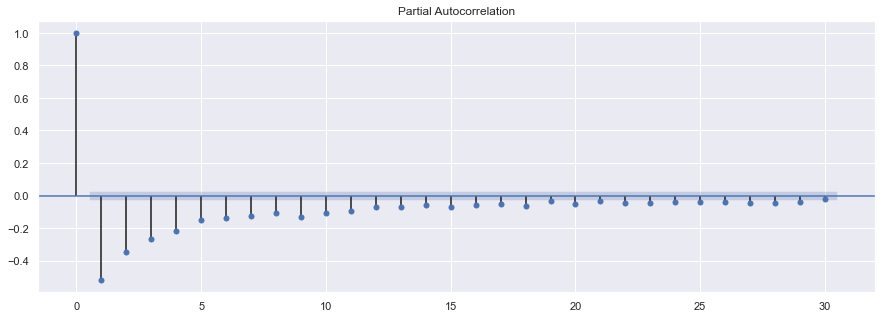

In [145]:
plot_pacf(timeseries.diff().dropna(), lags=30) #knowing d=1 we apply diff() once
plt.show()

Lag 1 is above the signicance level and so p = 1.

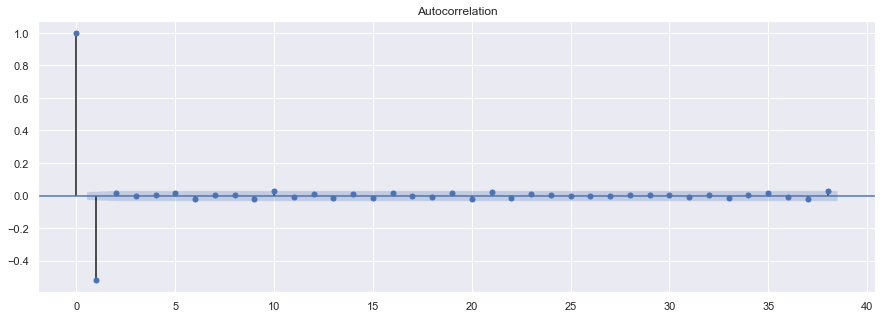

In [146]:
# The autocorrelation function can tell the order of MA terms, q, needed to remove autocorrelation in the stationary series.
plot_acf(timeseries.diff().dropna())
plt.show()

One above the significance level and thus q = 1.

In [147]:
model = ARIMA(timeseries, order=(1, 1, 2)) # p=1,d=1,q=1
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.return   No. Observations:                 5623
Model:                 ARIMA(1, 1, 2)   Log Likelihood               31395.509
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 29 Oct 2020   AIC                         -62781.019
Time:                        04:09:42   BIC                         -62747.845
Sample:                             1   HQIC                        -62769.461
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.099e-09   5.83e-08     -0.019      0.985   -1.15e-07    1.13e-07
ar.L1.D.return    -0.4172        nan        nan        nan         nan         nan
ma.L1.D.return    -0.6025        nan        nan        nan         nan         nan
ma.L2.D.return    -0.3910        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3972           +0.0000j            2.3972            0.5000
MA.1            1.0047           +0.0000j            1.0047            0.0000
MA.2           -2.5456           +0.0000j            2.5456            0.5000
-----------------------------------------------------------------------------
"""

In [148]:
# Akaike information criterion (AIC) estimates the relative amount of information lost by a given model. The less the better!

# AIC=-62.74K
# BIC=-62.71K

<Figure size 1200x400 with 0 Axes>

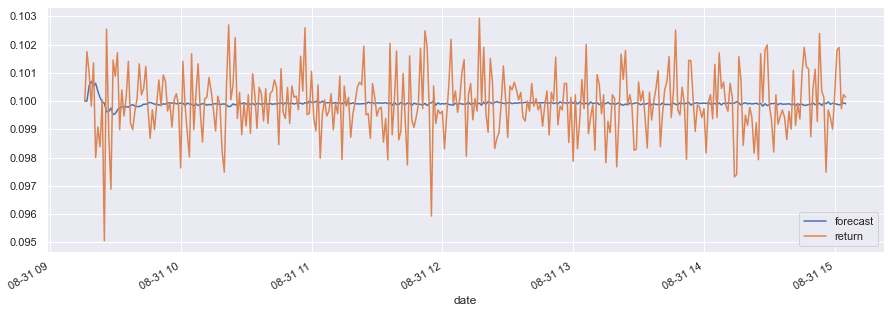

In [149]:
# Actual vs Forecast plot 
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

graph = results.plot_predict(1, 350) # provide start and end index 
plt.show()    

The model summary reveals a lot of information. 
The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.
Notice here the coefficient of the MA2 term is close to 0 and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

In [150]:
# Accuracy metrics
pred = pd.DataFrame(results.forecast(len(x_test))[0])
pred.columns = ["return"]
pred.index = x_test.index

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'minmax':minmax})

forecast_accuracy(pred.values, x_test.values)

{'mape': 0.006778107541999714,
 'me': -6.344399309127977e-05,
 'mae': 0.0006785685163897495,
 'mpe': -0.0005432236344164344,
 'rmse': 0.000958670745624675,
 'minmax': 0.00673823619714875}

In [151]:
data['close']=data['close'].fillna(method='ffill')

In [152]:
#### Rebuild the ARIMA Model without MA2 term (on closing price)

model = ARIMA(data['close'], order=(1, 1, 1)) # p=1,d=1,q=1
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 7873
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11162.661
Method:                       css-mle   S.D. of innovations              0.999
Date:                Thu, 29 Oct 2020   AIC                          22333.321
Time:                        04:09:46   BIC                          22361.206
Sample:                             1   HQIC                         22342.874
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0107      0.010     -1.057      0.290      -0.031       0.009
ar.L1.D.close     0.2116      0.146      1.453      0.146      -0.074       0.497
ma.L1.D.close    -0.2899      0.143     -2.031      0.042      -0.570      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7248           +0.0000j            4.7248            0.0000
MA.1            3.4494           +0.0000j            3.4494            0.0000
-----------------------------------------------------------------------------
"""

In [153]:
summ=results2.summary()

In [154]:
res1=pd.DataFrame(results.summary().tables[0])
res1.to_excel("arima_model_results.xlsx",sheet_name="Results",startrow=2)

In [155]:
res2=pd.DataFrame(results.summary().tables[1])
res2.to_excel("arima_model_results.xlsx",sheet_name="Results",startrow=10)

In [156]:
res3=pd.DataFrame(results.summary().tables[2])
res3.to_excel("arima_model_results.xlsx",sheet_name="Results",startrow=30)

In [157]:
# export multiple results to same excel file 
writer = pd.ExcelWriter('arima_model_results_final.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
res1.to_excel(writer, sheet_name='Sheet1',startrow=2)  # Default position, cell A1.
res2.to_excel(writer, sheet_name='Sheet1', startrow=10)
res3.to_excel(writer, sheet_name='Sheet1', startrow=20)

writer.save()  

In [158]:
res1.to_excel("arima_model_results.xlsx")
res2.to_excel("arima_model_results.xlsx")
res3.to_excel("arima_model_results.xlsx")

In [159]:
# add blank row to dataset
res1.reindex(res1.index.tolist() + list(range(20, 40)))
res2.reindex(res2.index.tolist() + list(range(20, 40)))
res3.reindex(res3.index.tolist() + list(range(20, 40)))
frames = [res1, res2, res3]
result = pd.concat(frames, axis=0)
result.to_excel("arima_model_results2.xlsx")

In [160]:
# save model
results2.save('arima_model_1.pkl')  

In [4]:
pwd

'C:\\Users\\SHALESH\\Desktop\\Capstone Project'

The model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

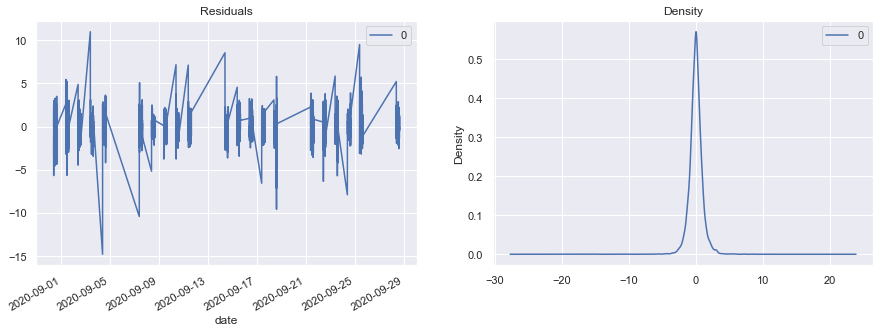

In [162]:
# Plot residual errors
residuals = pd.DataFrame(results2.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()  

The residual errors seem fine with near zero mean and uniform variance

In [163]:
data.head()

,open,high,low,close,volume,close_price_change2,return,return_detrend,date_new,dt,tm,day,month,month_new,year,week-year,month-year
date,,,,,,,,,,,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.80,24947,0.000000,0.100000,NaN,2020-08-31 09:15:00+05:30,2020-08-31,09:15:00,31,8,Aug,2020,2020-35,2020-08
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.80,29617,0.000000,0.100000,NaN,2020-08-31 09:16:00+05:30,2020-08-31,09:16:00,31,8,Aug,2020,2020-35,2020-08
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.80,21551,0.001750,0.101750,NaN,2020-08-31 09:17:00+05:30,2020-08-31,09:17:00,31,8,Aug,2020,2020-35,2020-08
2020-08-31 09:18:00+05:30,1145.05,1148.00,1144.6,1145.95,13455,0.001005,0.101005,NaN,2020-08-31 09:18:00+05:30,2020-08-31,09:18:00,31,8,Aug,2020,2020-35,2020-08
2020-08-31 09:19:00+05:30,1145.95,1147.00,1144.8,1145.75,8578,-0.000175,0.099825,NaN,2020-08-31 09:19:00+05:30,2020-08-31,09:19:00,31,8,Aug,2020,2020-35,2020-08


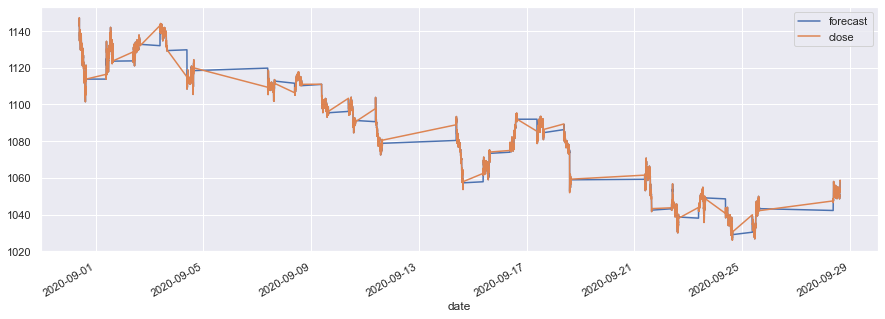

In [164]:
# Actual vs Fitted
results2.plot_predict(dynamic=False)
plt.show()  

RMSE: 0.0009580601984046628
MSE: 9.178793437671817e-07
MAE: 0.0006777264380969302
MAPE: 0.6770295720850412 %


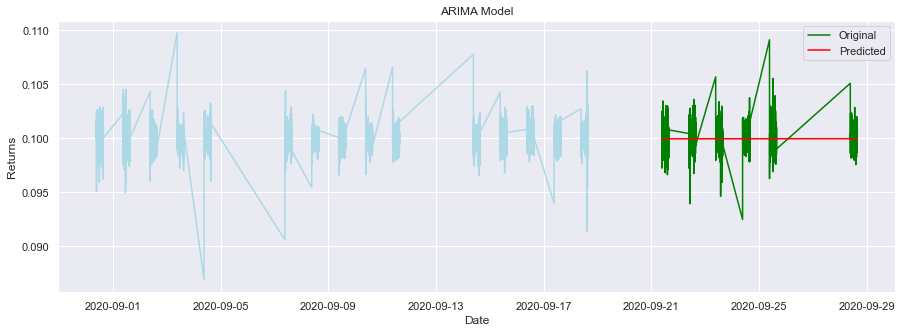

In [166]:
#### Rebuild the ARIMA Model (using Returns)

## ARIMA Model p=1, d=0, q=1 

model = ARIMA(x_train['return'], order=(1, 1, 1))     
results_ARIMA = model.fit()  

plt.figure(figsize=(15, 5))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green",label='Original')

## Forecasting 
pred = pd.DataFrame(results_ARIMA.forecast(len(x_test))[0])
pred.columns = ["return"]
pred.index = x_test.index

## Converting from log to normal value
# pred["return"] = pred["return"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
RMSE = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
MSE = mean_squared_error(x_test.values,pred.values)
MAE = mean_absolute_error(x_test.values,pred.values)
MAPE = float(sum(abs((x_test.values - pred.values)/(x_test.values)) * 100)/len(x_test))

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('MAPE: {} %'.format(MAPE))
plt.plot(pred.index, pred.fillna(0).values, color="red",label='Predicted')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('ARIMA Model')
plt.legend()

In [167]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'minmax':minmax})

forecast_accuracy(pred.values, x_test.values)

{'mape': 0.006770295720850401,
 'me': -5.417526810707033e-05,
 'mae': 0.0006777264380969302,
 'mpe': -0.00045053293402393704,
 'rmse': 0.0009580601984046628,
 'minmax': 0.006729864420406462}

### Auto-ARIMA Model 

In [168]:
# Automatic ARIMA using ADF to test stationarity, start values for p and q are set to 1, and the Stocks data is not assumed 
# to be seasonal:  

In [169]:
# !pip install pmdarima

In [170]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-62812.970, Time=2.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-62829.304, Time=3.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-62824.634, Time=7.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9938.263, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-62829.770, Time=9.52 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-62828.751, Time=4.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-62826.787, Time=4.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-62826.802, Time=2.87 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-62825.890, Time=6.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.30 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 42.374 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5624
Model:               SARIMAX(2, 0, 0)   Log Likel

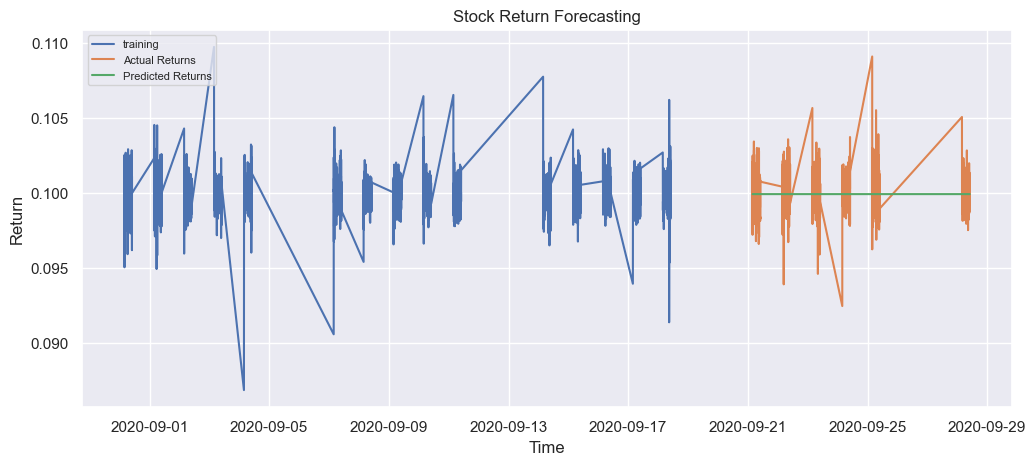

Auto-Arima RMSE :- 0.001
Auto-Arima MSE :- 0.0
Auto-Arima MAE :- 0.001


In [494]:
# Auto ARIMA Method
import math as mt

auto_arima_model = auto_arima(x_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_arima_model.summary())

# Fitting the final model with the order
fitted_model = auto_arima_model.fit(x_train) 
print(fitted_model.summary())
  
# Forecasting the values.
forecast_values = fitted_model.predict(len(x_test), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=x_test.index)

#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(x_train, label='training')
plt.plot(x_test, label='Actual Returns')
plt.plot(fcv_series,label='Predicted Returns')
plt.title('Stock Return Forecasting')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Evaluating the model by calculating RMSE.
rms_auto_arima = mt.sqrt(mean_squared_error(x_test.values, fcv_series))
mse_auto_arima = mean_squared_error(x_test.values,fcv_series)
mae_auto_arima= mean_absolute_error(x_test.values,fcv_series)

print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))
print("Auto-Arima MSE :- " + str(round(mse_auto_arima,3)))
print("Auto-Arima MAE :- " + str(round(mae_auto_arima,3)))

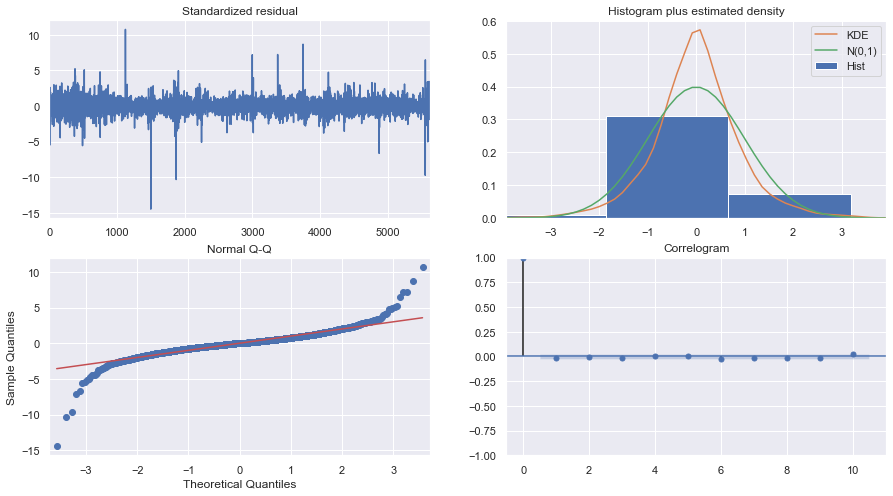

In [172]:
auto_arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

- Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

- Top Right: The density plot suggest normal distribution with mean zero.

- Bottom left: Most of the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

- Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

- Overall, it seems to be a good fit. Let’s forecast.

In [174]:
# plotarima(10, x_train['return'], auto_arima_model)

In [495]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5624
Model:               SARIMAX(2, 0, 0)   Log Likelihood               31418.885
Date:                Thu, 29 Oct 2020   AIC                         -62829.770
Time:                        20:38:18   BIC                         -62803.231
Sample:                             0   HQIC                        -62820.524
                               - 5624                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1079      0.001    108.293      0.000       0.106       0.110
ar.L1         -0.0583      0.007     -8.129      0.000      -0.072      -0.044
ar.L2         -0.0210      0.009     -2.223      0.026      -0.039      -0.002
sigma2      8.224e-07   4.94e-09    166.578      0.000    8.13e-07    8.32e-07
===================================================================================
Ljung-Box (Q):                       36.94   Jarque-Bera (JB):             79607.57
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### S-ARIMA Model 

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

In [176]:
# SARIMAX Model

pdq = [1,0,1]

print('Possible Orders:')
print(pdq)

print('Possible Seasonal Orders:')

i = j = k = range(0, 2)
a = [4,7]

for w in list(a):
    seasonal_pdq = [(x[0], x[1], x[2],w) for x in list(itertools.product(i, j, k))]
print(seasonal_pdq)

Possible Orders:
[1, 0, 1]
Possible Seasonal Orders:
[(0, 0, 0, 7), (0, 0, 1, 7), (0, 1, 0, 7), (0, 1, 1, 7), (1, 0, 0, 7), (1, 0, 1, 7), (1, 1, 0, 7), (1, 1, 1, 7)]


In [496]:
for param_seasonal in seasonal_pdq:
    mod = sm.tsa.statespace.SARIMAX(x_train['return'],order=(1,0,1),
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
    results = mod.fit()
    print('{} x {} - AIC:{}'.format(pdq, param_seasonal, results.aic))

[1, 0, 1] x (0, 0, 0, 7) - AIC:-61735.06739441566
[1, 0, 1] x (0, 0, 1, 7) - AIC:-61655.79578134983
[1, 0, 1] x (0, 1, 0, 7) - AIC:-58770.174007727335
[1, 0, 1] x (0, 1, 1, 7) - AIC:-61960.54696419896
[1, 0, 1] x (1, 0, 0, 7) - AIC:-57654.43910106674
[1, 0, 1] x (1, 0, 1, 7) - AIC:-61518.62202926187
[1, 0, 1] x (1, 1, 0, 7) - AIC:-60392.35079338122
[1, 0, 1] x (1, 1, 1, 7) - AIC:-61916.74001415337


In [501]:
mod = sm.tsa.statespace.SARIMAX(x_train['return'],order=(1, 0, 1),seasonal_order=(1, 1, 0, 7),enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5738      0.133      4.328      0.000       0.314       0.834
ma.L1         -0.6128      0.130     -4.727      0.000      -0.867      -0.359
ar.S.L7       -0.5054      0.006    -84.793      0.000      -0.517      -0.494
sigma2      1.232e-06   9.57e-09    128.663      0.000    1.21e-06    1.25e-06


In [502]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             return   No. Observations:                 5624
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 7)   Log Likelihood               30200.175
Date:                            Thu, 29 Oct 2020   AIC                         -60392.351
Time:                                    20:42:44   BIC                         -60365.822
Sample:                                         0   HQIC                        -60383.107
                                           - 5624                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5738      0.133      4.328      0.000       0.314       0.834
ma.L1         -0.6128      0.130   

- The model has estimated the AIC and the P values of the coefficients look significant.
- The best model SARIMAX(1, 0, 1)x(1,1,0,7) has an AIC of -60k and the P Values are significant.

RMSE: 0.005312319123245796
MSE: 2.822073446720298e-05
MAE: 0.00518113197530875
MAPE: 5.190075767022265 %


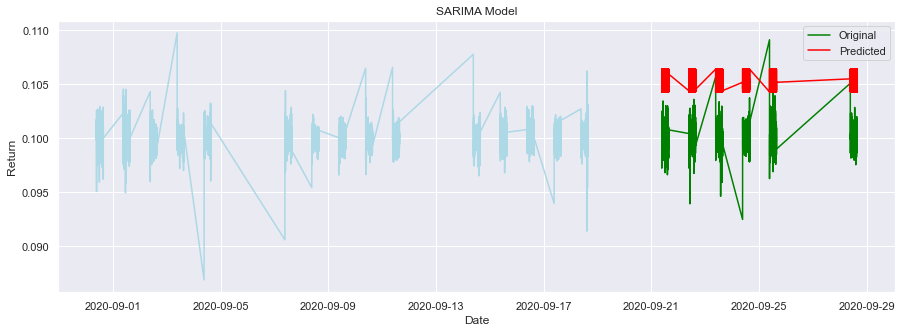

In [504]:
mod = sarimax.SARIMAX(x_train['return'],order=(1,0,1),seasonal_order=(0,1,1,7),enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit(disp=-1)

plt.figure(figsize=(15, 5))
plt.plot(x_train.index,x_train.values,color='lightblue')
plt.plot(x_test.index,x_test.values,color='green',label='Original')

pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ['return']
pred.index = x_test.index

## Converting from log to normal value
pred["return"] = pred["return"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
RMSE = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
MSE = mean_squared_error(x_test.values,pred.values)
MAE = mean_absolute_error(x_test.values,pred.values)
MAPE = float(sum(abs((x_test.values - pred.values)/(x_test.values)) * 100)/len(x_test))

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('MAPE: {} %'.format(MAPE))
plt.plot(pred.index, pred.fillna(0).values, color="red",label='Predicted')

plt.xlabel('Date')
plt.ylabel('Return')
plt.title('SARIMA Model')
plt.legend()

plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

plt.show()

- Stock data has non-linearities trend that ARIMA is not able to capture, However SARIMA is successful is capturing non-linearity

In [505]:
# Accuracy metrics

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'minmax':minmax})

forecast_accuracy(pred.values, x_test.values)  

{'mape': 0.051900757670222675,
 'me': 0.005176520268479199,
 'mae': 0.00518113197530875,
 'mpe': 0.05185839646585504,
 'rmse': 0.005312319123245796,
 'minmax': 0.04921475860092306}

### Holtz Winters (Exponential Smoothing) Model 

Holt-Winters Exponential Smoothing is used for forecasting time series data that exhibits both a trend and a seasonal variation. The Holt-Winters technique is made up of the following four forecasting techniques stacked one over the other:

- Weighted Averages: A weighted average is simply an average of n numbers where each number is given a certain weight and the denominator is the sum of those n weights. The weights are often assigned as per some weighing function. Common weighing functions are logarithmic, linear, quadratic, cubic and exponential. Averaging as a time series forecasting technique has the property of smoothing out the variation in the historical values while calculating the forecast. By choosing a suitable weighing function, the forecaster determines which historical values should be given emphasis for calculating future values of the time series.


- Exponential Smoothing: The Exponential Smoothing (ES) technique forecasts the next value using a weighted average of all previous values where the weights decay exponentially from the most recent to the oldest historical value. When you use ES, you are making the crucial assumption that recent values of the time series are much more important to you than older values. The ES technique has two big shortcomings: It cannot be used when your data exhibits a trend and/or seasonal variations.


- Holt Exponential Smoothing: The Holt ES technique fixes one of the two shortcomings of the simple ES technique. Holt ES can be used to forecast time series data that has a trend. But Holt ES fails in the presence of seasonal variations in the time series.


- Holt-Winters Exponential Smoothing: The Holt-Winters ES modifies the Holt ES technique so that it can be used in the presence of both trend and seasonality.

In [506]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,  mean_absolute_error

In [507]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [508]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = pd.read_csv('hdfcbank.csv', index_col=['date'], parse_dates=['date'])

In [510]:
data['close_price_change2'] = data['close'].pct_change()
data['close_price_change2'] = data['close_price_change2'].fillna(0)  
data['return']=data['close_price_change2']+(0.1) 
data.drop(['Unnamed: 0','NA'],1,inplace=True)

In [511]:
data.head(5)

,open,high,low,close,volume,close_price_change2,return
date,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.80,24947,0.000000,0.100000
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.80,29617,0.000000,0.100000
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.80,21551,0.001750,0.101750
2020-08-31 09:18:00+05:30,1145.05,1148.00,1144.6,1145.95,13455,0.001005,0.101005
2020-08-31 09:19:00+05:30,1145.95,1147.00,1144.8,1145.75,8578,-0.000175,0.099825


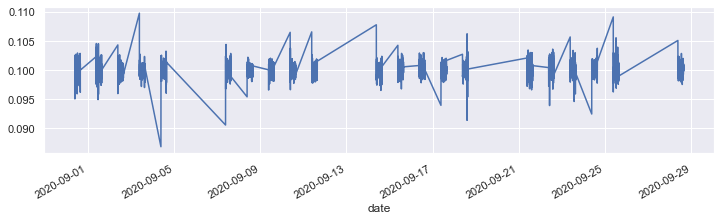

In [512]:
train = data.iloc[:-250, :]
test = data.iloc[-250:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()
data['return'].plot(figsize=(12,3))

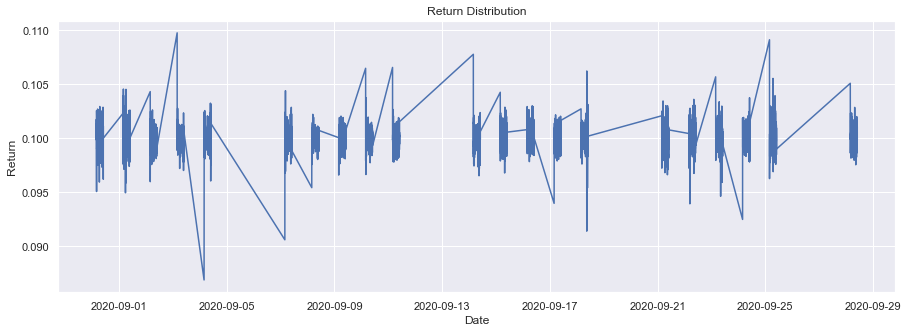

In [513]:
plt.plot(data['return'])

plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Return Distribution')

plt.savefig('return1.png', dpi=300, bbox_inches='tight')

plt.show()

### Exponential smoothing

In [514]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [515]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

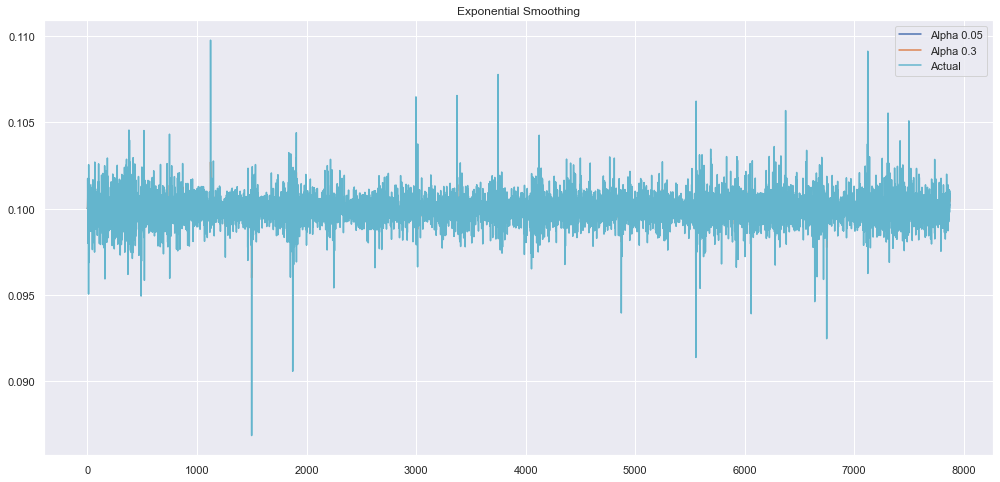

In [516]:
plot_exponential_smoothing(data['return'], [0.05, 0.3]) # alphas=0.05 and 0.3 

### Double exponential smoothing 

In [517]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [518]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

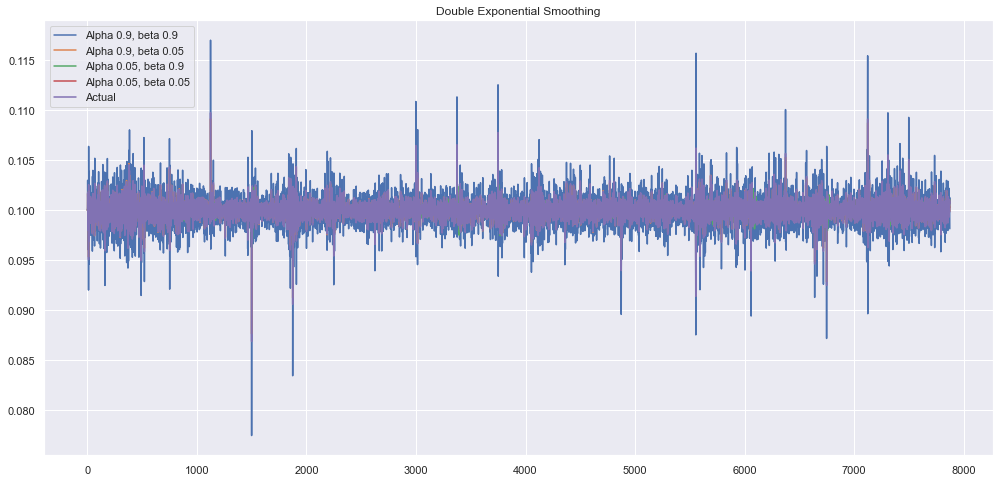

In [519]:
plot_double_exponential_smoothing(data['return'],alphas=[0.9, 0.05], betas=[0.9, 0.05])

- Now we have to tune two parameters:  𝛼  and  𝛽 . The former is responsible for the series smoothing around the trend, the latter for the smoothing of 
the trend itself. 
- The larger the values, the more weight the most recent observations will have and the less smoothed the model series will be. 
- Certain combinations of the parameters may produce strange results, especially if set manually. 
- We'll look into choosing parameters automatically in a bit; before that, let's discuss triple exponential smoothing.

### Triple exponential smoothing (Holt-Winters)

The idea is to add a third component - seasonality. This means that we should not use this method if our time series is not expected to have seasonality.
Seasonal components in the model will explain repeated variations around intercept and trend, and it will be specified by the length of the season, 
in other words by the period after which the variations repeat. For each observation in the season, there is a separate component; 
for example, if the length of the season is 7 days (a weekly seasonality), we will have 7 seasonal components, one for each day of the week.

In [520]:
class HoltWinters:
    
        #     """
        #     Holt-Winters model with the anomalies detection using Brutlag method
            
        #     # series - initial time series
        #     # slen - length of a season
        #     # alpha, beta, gamma - Holt-Winters model coefficients
        #     # n_preds - predictions horizon
        #     # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
            
        #     """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

Now, knowing how to set up cross-validation, we can find the optimal parameters for the Holt-Winters model. 
Recall that we have daily seasonality in ads, hence the slen=24 parameter.

In [521]:
### Cross validation

from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    
    #     """
    #         Returns error on CV  
            
    #         params - vector of parameters for optimization
    #         series - dataset with timeseries
    #         slen - season length for Holt-Winters model
    #     """
    
    
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        
        model.triple_exponential_smoothing()
        
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [522]:
%%time

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data['return'], mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 60 minutes
model = HoltWinters(data['return'], slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 60, scaling_factor = 3)
model.triple_exponential_smoothing()

0.0031501048719081437 0.0034229388558386087 0.004849208381174697
Wall time: 29.5 s


In [523]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    
    #     """
    #         series - dataset with timeseries
    #         plot_intervals - show confidence intervals
    #         plot_anomalies - show anomalies 
    #     """
             
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

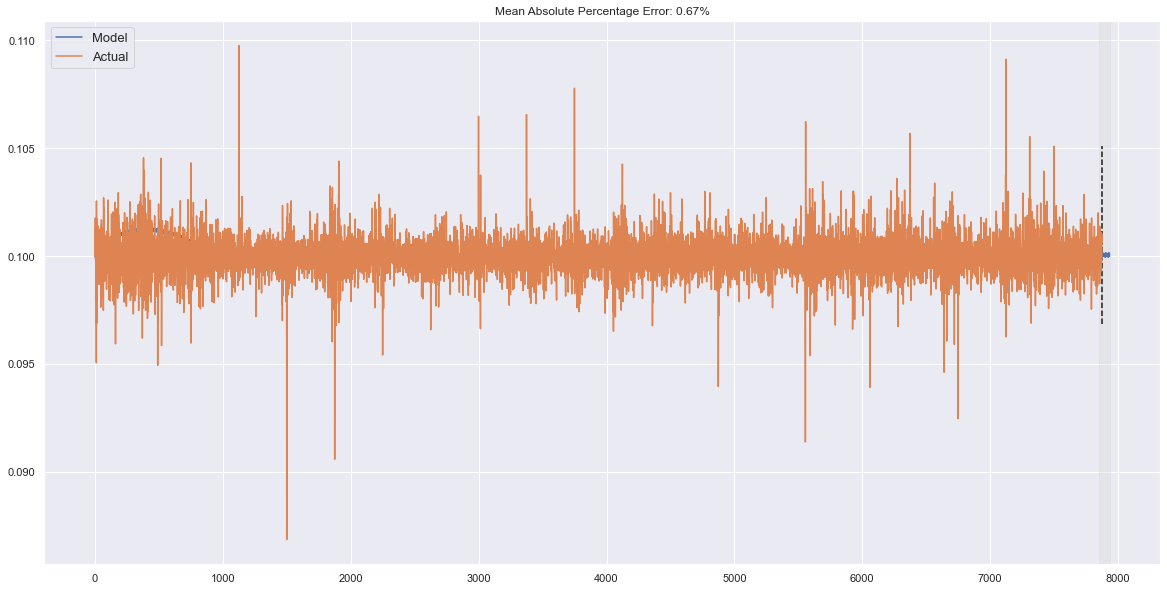

In [524]:
plotHoltWinters(data['return'])

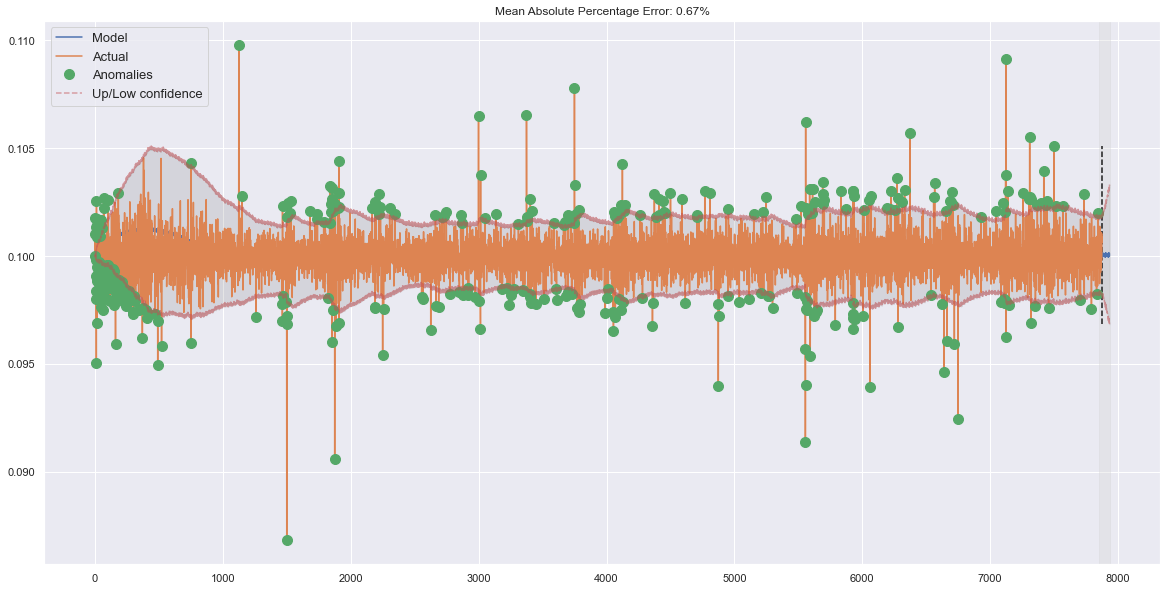

In [525]:
plotHoltWinters(data['return'], plot_intervals=True, plot_anomalies=True)

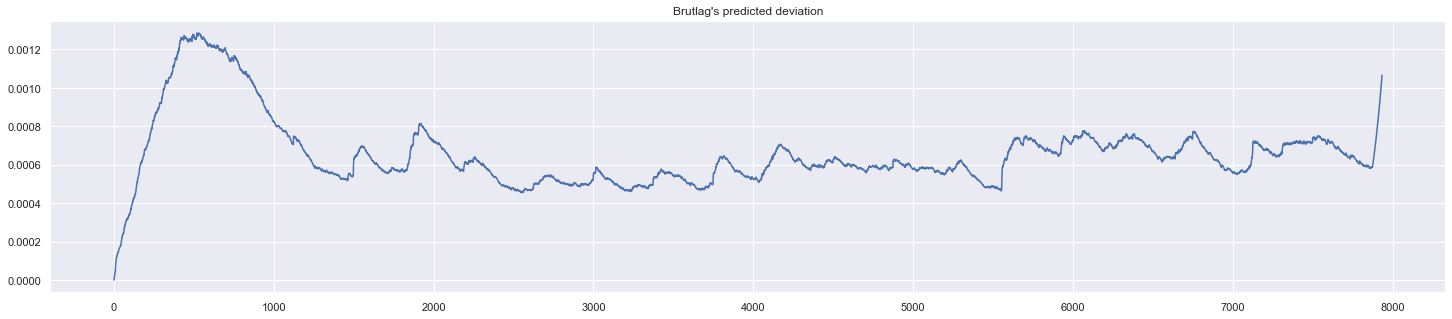

In [526]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

Our model is able to approximate the initial time series, capturing the minute wise seasonality, overall upward trend, and even some anomalies. If you look at the model deviations, you can clearly see that the model reacts quite sharply to changes in the structure of the series but then quickly returns the deviation to the normal values, essentially "forgetting" the past. 

In [614]:
# #split between the training and the test data sets. The last 12 periods form the test data
# data_train = data['return'].iloc[:-200]
# data_test = data['return'].iloc[-200:]

# #build and train the model on the training data
# model = HWES(data_train, seasonal_periods=12, trend='add', seasonal='mul')
# fitted = model.fit(optimized=True, use_brute=True)

# #print out the training summary
# print(fitted.summary())

# #create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
# sales_forecast = fitted.forecast(steps=12)

In [527]:
data.head()

,open,high,low,close,volume,close_price_change2,return
date,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.80,24947,0.000000,0.100000
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.80,29617,0.000000,0.100000
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.80,21551,0.001750,0.101750
2020-08-31 09:18:00+05:30,1145.05,1148.00,1144.6,1145.95,13455,0.001005,0.101005
2020-08-31 09:19:00+05:30,1145.95,1147.00,1144.8,1145.75,8578,-0.000175,0.099825


In [528]:
# Split the series to predict the last 3 months of 2020
data['date'] = data.index 
data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)

In [332]:
data.head()

,open,high,low,close,volume,close_price_change2,return,date
date,,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.80,24947,0.000000,0.100000,2020-08-31 09:15:00+05:30
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.80,29617,0.000000,0.100000,2020-08-31 09:16:00+05:30
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.80,21551,0.001750,0.101750,2020-08-31 09:17:00+05:30
2020-08-31 09:18:00+05:30,1145.05,1148.00,1144.6,1145.95,13455,0.001005,0.101005,2020-08-31 09:18:00+05:30
2020-08-31 09:19:00+05:30,1145.95,1147.00,1144.8,1145.75,8578,-0.000175,0.099825,2020-08-31 09:19:00+05:30


In [529]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d') # convert date column to datatime object
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data['weekday'] = np.where(data.weekday == 0, 7, data.weekday)

In [531]:
# Split the series to predict the last 3k records
# train_df = data.loc[:'2020-09-20'].reset_index(drop=False)                         
# test_df = data.loc['2017-09-21':].reset_index(drop=False)
# train_df.head()

data['dt'] = data['date'].dt.date
data['tm'] = data['date'].dt.time

train_df = data[data['dt'] < pd.Timestamp('2020-09-20')]
test_df = data[data['dt'] >= pd.Timestamp('2020-09-20')]

train_df.head()

,open,high,low,close,volume,close_price_change2,return,date,year,month,day,weekday,dt,tm
date,,,,,,,,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.80,24947,0.000000,0.100000,2020-08-31 09:15:00+05:30,2020,8,31,7,2020-08-31,09:15:00
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.80,29617,0.000000,0.100000,2020-08-31 09:16:00+05:30,2020,8,31,7,2020-08-31,09:16:00
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.80,21551,0.001750,0.101750,2020-08-31 09:17:00+05:30,2020,8,31,7,2020-08-31,09:17:00
2020-08-31 09:18:00+05:30,1145.05,1148.00,1144.6,1145.95,13455,0.001005,0.101005,2020-08-31 09:18:00+05:30,2020,8,31,7,2020-08-31,09:18:00
2020-08-31 09:19:00+05:30,1145.95,1147.00,1144.8,1145.75,8578,-0.000175,0.099825,2020-08-31 09:19:00+05:30,2020,8,31,7,2020-08-31,09:19:00


In [532]:
train_df.shape

(5624, 14)

In [533]:
test_df.shape

(2250, 14)

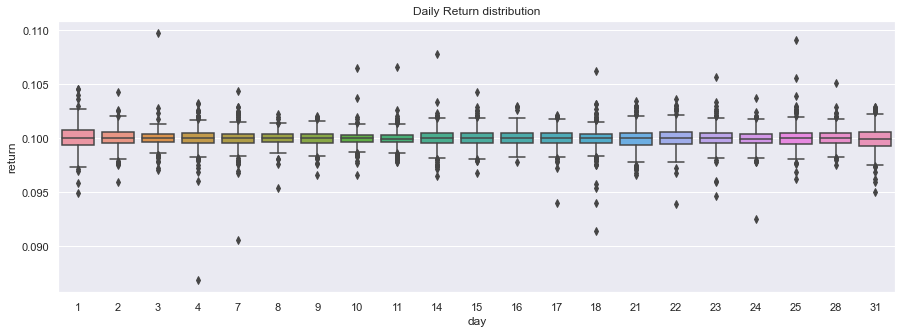

In [534]:
plot = sns.boxplot(x='day', y='return', data=data)
_ = plot.set(title='Daily Return distribution')

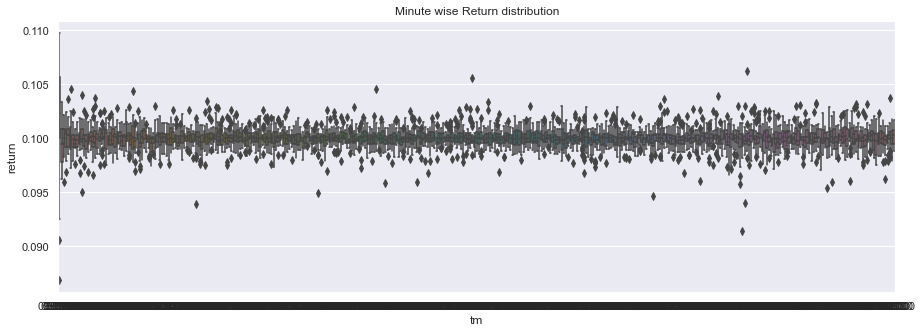

In [539]:
plot = sns.boxplot(x='tm', y='return', data=data)
_ = plot.set(title='Minute wise Return distribution')

In [540]:
ts_decomp_df = train_df.set_index('date') # set date as index
ts_decomp_df['return'] = ts_decomp_df['return'].astype(float)
ts_decomp_df.head()

,open,high,low,close,volume,close_price_change2,return,year,month,day,weekday,dt,tm
date,,,,,,,,,,,,,
2020-08-31 09:15:00+05:30,1125.20,1143.10,1125.2,1142.80,24947,0.000000,0.100000,2020,8,31,7,2020-08-31,09:15:00
2020-08-31 09:16:00+05:30,1143.25,1145.95,1141.5,1142.80,29617,0.000000,0.100000,2020,8,31,7,2020-08-31,09:16:00
2020-08-31 09:17:00+05:30,1143.55,1146.50,1143.0,1144.80,21551,0.001750,0.101750,2020,8,31,7,2020-08-31,09:17:00
2020-08-31 09:18:00+05:30,1145.05,1148.00,1144.6,1145.95,13455,0.001005,0.101005,2020,8,31,7,2020-08-31,09:18:00
2020-08-31 09:19:00+05:30,1145.95,1147.00,1144.8,1145.75,8578,-0.000175,0.099825,2020,8,31,7,2020-08-31,09:19:00


<Figure size 1080x360 with 0 Axes>

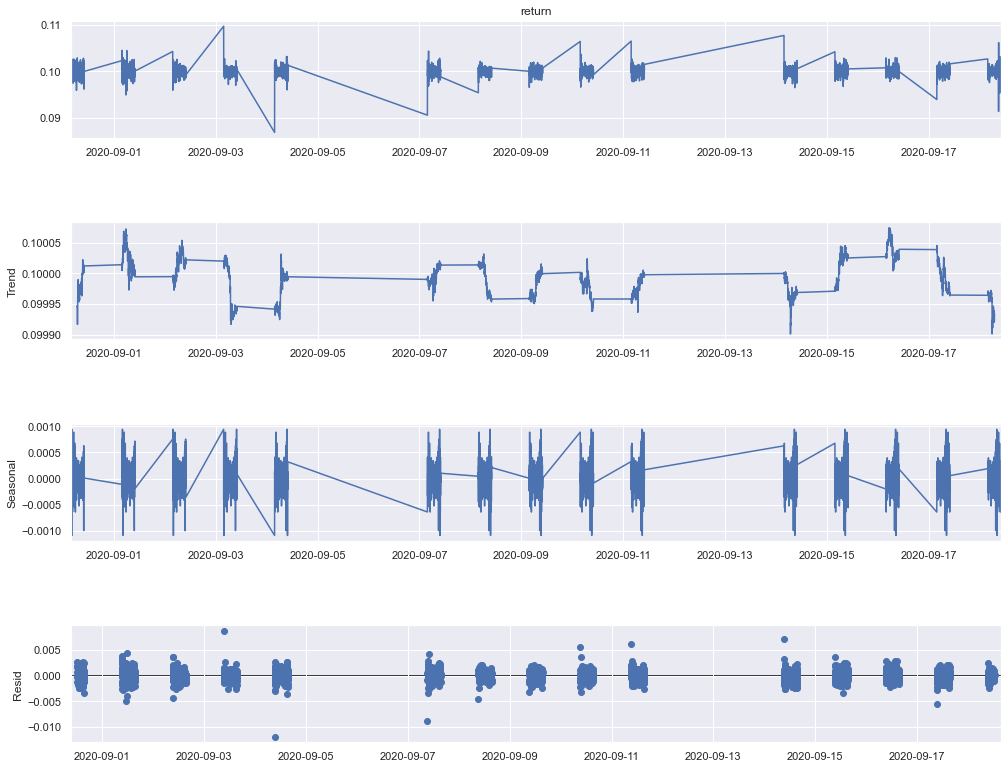

In [541]:
result = seasonal_decompose(ts_decomp_df['return'], model='additive', freq=365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)

In [542]:
hw_train_df = train_df[['date', 'return']].set_index('date')
hw_test_df = test_df[['date', 'return']].set_index('date')

In [543]:
hw_test_df.head()

,return
date,
2020-09-21 09:15:00+05:30,0.102077
2020-09-21 09:16:00+05:30,0.097221
2020-09-21 09:17:00+05:30,0.100425
2020-09-21 09:18:00+05:30,0.100000
2020-09-21 09:19:00+05:30,0.099008


In [545]:
hw_test_df.shape

(2250, 1)

In [544]:
# hw_model_1 = ExponentialSmoothing(hw_train_df['return'][:5520],trend='multiplicative', seasonal='multiplicative', seasonal_periods=60) # hourly seasonality
# hw_fit_1 = hw_model_1.fit(use_boxcox=False, remove_bias=False)

In [562]:
# from datetime import datetime
# dt_obj = datetime.fromtimestamp(hw_test_df[0]).strftime('%y-%m-%d')
# type(dt_obj)

In [ ]:
# forecast = model.forecast(steps=int(pred))

In [569]:
# Apply Triple Exponential Smoothing

hw_model_1 = ExponentialSmoothing(hw_train_df, trend='add', seasonal='add', seasonal_periods=7) 
# 4 for quarterly data or 7 for daily data with a weekly cycle.
hw_fit_1 = hw_model_1.fit(use_boxcox=False, remove_bias=False)
pred_fit_1 = pd.Series(hw_fit_1.forecast(steps=2250), 
                       name='pred_returns').reset_index()


hw_model_2 = ExponentialSmoothing(hw_train_df, trend='add', seasonal='add', seasonal_periods=7, damped=True)
hw_fit_2 = hw_model_2.fit(use_boxcox=False, remove_bias=False)
pred_fit_2 = pd.Series(hw_fit_2.forecast(steps=2250), 
                       name='pred_returns').reset_index()
print('Forecasts made, ready for evaluation')

Forecasts made, ready for evaluation


In [578]:
pred_fit_1[['pred_returns']]

,pred_returns
0,0.099961
1,0.100330
2,0.099923
3,0.100656
4,0.099994
...,...
2245,0.118087
2246,0.118172
2247,0.117825
2248,0.118193


In [580]:
forecast_accuracy(pred_fit_1[['pred_returns']].values,hw_test_df.values)

{'mape': 0.09163577830303432,
 'me': 0.009130787615621415,
 'mae': 0.009155195727346839,
 'mpe': 0.09139668501067752,
 'rmse': 0.010526186635188216,
 'minmax': 0.08185341877707508}

In [618]:
forecast_accuracy(pred_fit_2[['pred_returns']].values,hw_test_df.values)

{'mape': 0.00700341592725787,
 'me': 5.702088183042078e-05,
 'mae': 0.0007003072323326157,
 'mpe': 0.0006608037460994361,
 'rmse': 0.0009813939008088148,
 'minmax': 0.006952854427926147}

In [585]:
pred_fit_1.index = test_df.index 

In [589]:
pred_fit_1.drop('index', inplace =True,axis=1)

In [603]:
test_df

,open,high,low,close,volume,close_price_change2,return,date,year,month,day,weekday,dt,tm
date,,,,,,,,,,,,,,
2020-09-21 09:15:00+05:30,1052.00,1062.85,1052.00,1061.50,7611,0.002077,0.102077,2020-09-21 09:15:00+05:30,2020,9,21,7,2020-09-21,09:15:00
2020-09-21 09:16:00+05:30,1062.40,1062.40,1057.95,1058.55,10324,-0.002779,0.097221,2020-09-21 09:16:00+05:30,2020,9,21,7,2020-09-21,09:16:00
2020-09-21 09:17:00+05:30,1059.10,1059.55,1057.60,1059.00,3931,0.000425,0.100425,2020-09-21 09:17:00+05:30,2020,9,21,7,2020-09-21,09:17:00
2020-09-21 09:18:00+05:30,1058.50,1059.85,1058.50,1059.00,2099,0.000000,0.100000,2020-09-21 09:18:00+05:30,2020,9,21,7,2020-09-21,09:18:00
2020-09-21 09:19:00+05:30,1058.55,1059.05,1057.50,1057.95,1981,-0.000992,0.099008,2020-09-21 09:19:00+05:30,2020,9,21,7,2020-09-21,09:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28 15:25:00+05:30,1055.95,1056.20,1055.70,1056.00,450,0.000047,0.100047,2020-09-28 15:25:00+05:30,2020,9,28,7,2020-09-28,15:25:00
2020-09-28 15:26:00+05:30,1056.00,1056.95,1056.00,1056.95,534,0.000900,0.100900,2020-09-28 15:26:00+05:30,2020,9,28,7,2020-09-28,15:26:00
2020-09-28 15:27:00+05:30,1057.00,1057.90,1056.65,1057.60,1620,0.000615,0.100615,2020-09-28 15:27:00+05:30,2020,9,28,7,2020-09-28,15:27:00


In [604]:
pred_fit_1['date']=pred_fit_1.index

In [606]:
test_df_1=test_df[['return']]

In [607]:
test_df_1.reset_index(drop=True,inplace=True)
pred_fit_1.reset_index(drop=True,inplace=True)

In [611]:
# Merge predictions and actual sales into one df
errors_df_hw = pd.merge(test_df_1, pred_fit_1,right_index=True,left_index=True) # merge based on index 
errors_df_hw = errors_df_hw[['date', 'return', 'pred_returns']]
  
errors_df_hw['errors'] = errors_df_hw['return'] - errors_df_hw['pred_returns']
errors_df_hw.insert(0, 'model', 'Holt-Winters')

In [613]:
errors_df_hw

,model,date,return,pred_returns,errors
0,Holt-Winters,2020-09-21 09:15:00+05:30,0.102077,0.099961,0.002116
1,Holt-Winters,2020-09-21 09:16:00+05:30,0.097221,0.100330,-0.003109
2,Holt-Winters,2020-09-21 09:17:00+05:30,0.100425,0.099923,0.000502
3,Holt-Winters,2020-09-21 09:18:00+05:30,0.100000,0.100656,-0.000656
4,Holt-Winters,2020-09-21 09:19:00+05:30,0.099008,0.099994,-0.000985
...,...,...,...,...,...
2245,Holt-Winters,2020-09-28 15:25:00+05:30,0.100047,0.118087,-0.018040
2246,Holt-Winters,2020-09-28 15:26:00+05:30,0.100900,0.118172,-0.017272
2247,Holt-Winters,2020-09-28 15:27:00+05:30,0.100615,0.117825,-0.017210
2248,Holt-Winters,2020-09-28 15:28:00+05:30,0.101040,0.118193,-0.017153


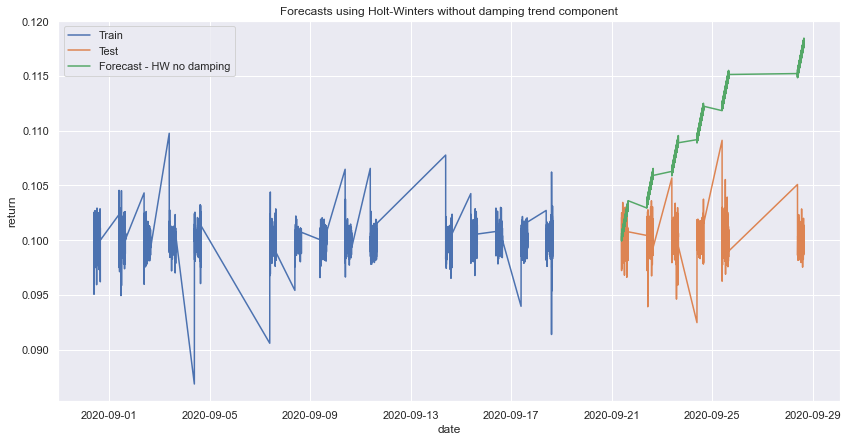

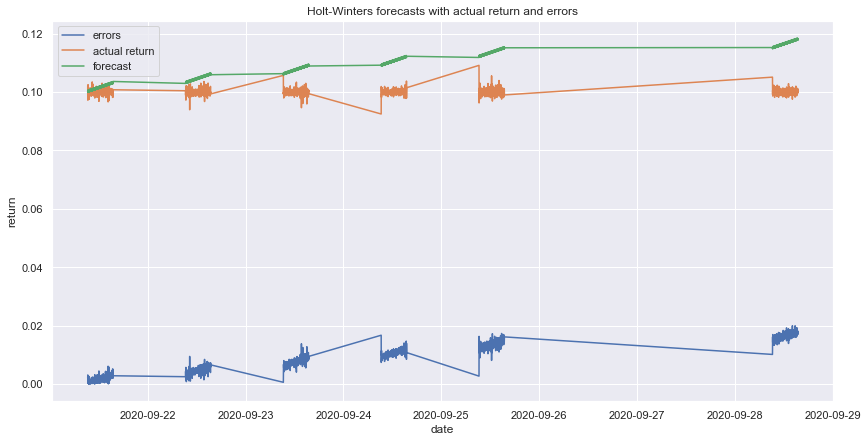

In [615]:
# Evaluate the predictions for Holt-Winters without damping trend component
plt.figure(figsize=(14,7))
plt.plot(train_df['date'], train_df['return'], label='Train')
plt.plot(test_df['date'], test_df['return'], label='Test')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_returns'], label='Forecast - HW no damping')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('return')
plt.title('Forecasts using Holt-Winters without damping trend component')
plt.show()


plt.figure(figsize=(14,7))
plt.plot(errors_df_hw['date'], np.abs(errors_df_hw['errors']), label='errors')
plt.plot(errors_df_hw['date'], errors_df_hw['return'], label='actual return')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_returns'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('return')
plt.title('Holt-Winters forecasts with actual return and errors')
plt.show()

# result_df_hw = errors_df_hw.groupby('model').agg(total_return=('return', 'sum'),
#                                           total_pred_returns=('pred_returns', 'sum'),
#                                           holt_winters_overall_error=('errors', 'sum'),
#                                           MAE=('errors', mae),
#                                           RMSE=('errors', rmse), 
#                                           MAPE=('errors', mape))
# result_df_hw  

In [ ]:
# Evaluate the predictions for Holt-Winters without damping trend component
plt.figure(figsize=(14,7))
plt.plot(train_df['date'], train_df['return'], label='Train')
plt.plot(test_df['date'], test_df['return'], label='Test')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_returns'], label='Forecast - HW no damping')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('return')
plt.title('Forecasts using Holt-Winters without damping trend component')
plt.show()


plt.figure(figsize=(14,7))
plt.plot(errors_df_hw['date'], np.abs(errors_df_hw['errors']), label='errors')
plt.plot(errors_df_hw['date'], errors_df_hw['return'], label='actual return')
plt.plot(errors_df_hw['date'], errors_df_hw['pred_returns'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('return')
plt.title('Holt-Winters forecasts with actual return and errors')
plt.show()

# result_df_hw = errors_df_hw.groupby('model').agg(total_return=('return', 'sum'),
#                                           total_pred_returns=('pred_returns', 'sum'),
#                                           holt_winters_overall_error=('errors', 'sum'),
#                                           MAE=('errors', mae),
#                                           RMSE=('errors', rmse), 
#                                           MAPE=('errors', mape))
# result_df_hw  

In [616]:
pred_fit_2[['pred_returns']]
forecast_accuracy(pred_fit_2[['pred_returns']].values,hw_test_df.values)

pred_fit_2.index = test_df.index 
pred_fit_2.drop('index', inplace =True,axis=1)
pred_fit_2['date']=pred_fit_2.index
test_df_2=test_df[['return']]
test_df_2.reset_index(drop=True,inplace=True)
pred_fit_2.reset_index(drop=True,inplace=True)

# Merge predictions and actual sales into one df
errors_df_hw2 = pd.merge(test_df_2, pred_fit_2,right_index=True,left_index=True) # merge based on index 
errors_df_hw2 = errors_df_hw2[['date', 'return', 'pred_returns']]
  
errors_df_hw2['errors'] = errors_df_hw2['return'] - errors_df_hw['pred_returns']
errors_df_hw2.insert(0, 'model', 'Holt-Winters')

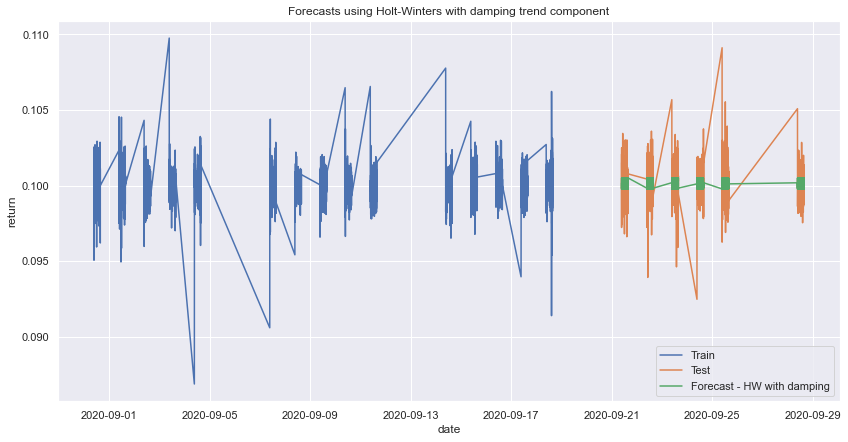

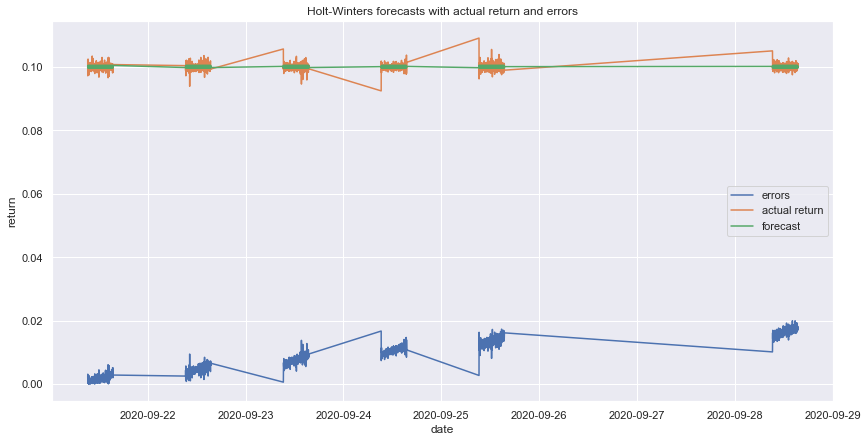

In [619]:
# Evaluate the predictions for Holt-Winters with damping trend component

plt.figure(figsize=(14,7))
plt.plot(train_df['date'], train_df['return'], label='Train')
plt.plot(test_df['date'], test_df['return'], label='Test')
plt.plot(errors_df_hw2['date'], errors_df_hw2['pred_returns'], label='Forecast - HW with damping')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('return')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.show()


plt.figure(figsize=(14,7))
plt.plot(errors_df_hw2['date'], np.abs(errors_df_hw2['errors']), label='errors')
plt.plot(errors_df_hw2['date'], errors_df_hw2['return'], label='actual return')
plt.plot(errors_df_hw2['date'], errors_df_hw2['pred_returns'], label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('return')
plt.title('Holt-Winters forecasts with actual return and errors')
plt.show()
  
# result_df_hw = errors_df_hw2.groupby('model').agg(total_return=('return', 'sum'),
#                                           total_pred_returns=('pred_returns', 'sum'),
#                                           holt_winters_overall_error=('errors', 'sum'),
#                                           MAE=('errors', mae),
#                                           RMSE=('errors', rmse), 
#                                           MAPE=('errors', mape))
# result_df_hw  

In [620]:
# test_df=data[38:48]
# test_df['date_new'] = test_df.index 
# test=test_df[['date_new','return']]
# test.info()

# # convert the datetime column to a datetime type
# test['date_new'] = pd.to_datetime(test['date_new'])

# # set the column as the index
# test.set_index('date_new', inplace=True)  # When set_index is done then that variable doesnt remain as a column anymore, it becomes a index

In [621]:
# Facebook Prosphet

# !pip install fbprophet

import pandas as pd
import pystan
from fbprophet import Prophet

In [622]:
import fbprophet
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [623]:
x_train.head()

,return
date,
2020-08-31 09:15:00+05:30,0.100000
2020-08-31 09:16:00+05:30,0.100000
2020-08-31 09:17:00+05:30,0.101750
2020-08-31 09:18:00+05:30,0.101005
2020-08-31 09:19:00+05:30,0.099825


In [624]:
x_train = x_train.reset_index().rename(columns={'date':'ds', 'return':'y'})

In [625]:
x_train.head(4)

,ds,y
0,2020-08-31 09:15:00+05:30,0.100000
1,2020-08-31 09:16:00+05:30,0.100000
2,2020-08-31 09:17:00+05:30,0.101750
3,2020-08-31 09:18:00+05:30,0.101005


In [626]:
# remove time part from datetime 
x_train['ds'] = pd.to_datetime(x_train['ds']).dt.date

# x_train['ds'] = x_train['ds'].dt.tz_convert(None)

In [627]:
# Model initialization
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)

In [628]:
# model.fit(x_train)

In [629]:
# model.add_seasonality(name='Weekly', period=7, fourier_order=5)
# future = model.make_future_dataframe(periods=150, freq='min')  

In [630]:
# help(model.make_future_dataframe)

In [631]:
# For Prophet to predict, its required for the names on the variables to be ds and y
def rename_func(dataframe):
    cols = dataframe.columns
    dataframe.rename(columns= {cols[0]: 'ds', cols[1]:'y'}, inplace= True)
    return dataframe

In [632]:
x_train = rename_func(x_train)


In [633]:
x_train.head(3)

,ds,y
0,2020-08-31,0.10000
1,2020-08-31,0.10000
2,2020-08-31,0.10175


In [634]:
# Fitting model
# model.fit(x_train)  

In [635]:
# m = Prophet(daily_seasonality=True,yearly_seasonality=False,weekly_seasonality=False)
# m.add_seasonality(name='daily', period=3, fourier_order=3)
# m.fit(x_train)

In [636]:
# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [637]:
# fig1 = m.plot(forecast)

In [638]:
# fig2 = m.plot_components(forecast)